This script pulls together all of the data into a single dataframe for modeling.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np 
import os 

1. VMT

Before joining VMT, i make a hand edit to the Imputed File to Sum the five sub-counties of DC into 11001, then delete the five subcounties to that the fips will match up with the rest of the data

In [2]:
#read in data, melt frame
VMT_df = pd.read_csv('County VMT/Data/County_VMT_2000_2020_INT__PrinArterial.csv')

df = VMT_df
df = df.rename(columns = {'VMT_TOTAL':'VMT'})
df

,YEAR,STATE_CODE,COUNTY_CODE,VMT,Full_FIPS_Code,fipsyear
0,2000,1,1,2.744493e+08,1001,01001-2000
1,2000,1,3,1.196020e+09,1003,01003-2000
2,2000,1,5,1.276073e+08,1005,01005-2000
3,2000,1,7,9.060923e+07,1007,01007-2000
4,2000,1,9,2.181014e+08,1009,01009-2000
...,...,...,...,...,...,...
62085,2010,56,39,1.513659e+08,56039,56039-2010
62086,2010,56,41,2.683489e+08,56041,56041-2010
62087,2010,56,43,4.984219e+07,56043,56043-2010
62088,2010,56,45,5.456499e+07,56045,56045-2010


GHG

In [3]:
ghg_df = pd.read_csv('GHG/GHG_COUNTY_ALL.csv')
ghg_df['STATE_CODE'] = ghg_df['FIPS_CODE'].astype(str).str[:-3].astype(int)
ghg_df['COUNTY_CODE'] = ghg_df['FIPS_CODE'].astype(str).str[-3:].astype(int)
ghg_df['YEAR'] = ghg_df['YEAR']

In [4]:
df = df.merge(ghg_df, how = 'left',
              left_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'], 
              right_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'])


In [5]:
df = df.drop(columns = ['FIPS_CODE'])

In [6]:
df

,YEAR,STATE_CODE,COUNTY_CODE,VMT,Full_FIPS_Code,fipsyear,TOTAL_EMISSIONS
0,2000,1,1,2.744493e+08,1001,01001-2000,NaN
1,2000,1,3,1.196020e+09,1003,01003-2000,NaN
2,2000,1,5,1.276073e+08,1005,01005-2000,NaN
3,2000,1,7,9.060923e+07,1007,01007-2000,NaN
4,2000,1,9,2.181014e+08,1009,01009-2000,NaN
...,...,...,...,...,...,...,...
62085,2010,56,39,1.513659e+08,56039,56039-2010,NaN
62086,2010,56,41,2.683489e+08,56041,56041-2010,NaN
62087,2010,56,43,4.984219e+07,56043,56043-2010,NaN
62088,2010,56,45,5.456499e+07,56045,56045-2010,NaN


Population

In [7]:
pop_df = pd.read_csv('Population/County_population_2000_2022.csv')
year_list = list(range(2000,2021))
year_list = [str(i) for i in year_list ]


pop_df = pop_df[['STATE', 'COUNTY'] + year_list]
pop_df = pd.melt(pop_df, id_vars = ['STATE', 'COUNTY'], value_vars = year_list).rename(columns = {'variable':'YEAR','value':'POPULATION'})
pop_df['YEAR'] = pop_df['YEAR'].astype(int)

In [8]:
pop_df[pop_df['POPULATION'].isna()]

,STATE,COUNTY,YEAR,POPULATION
31940,1,0,2010,NaN
32008,2,0,2010,NaN
32028,2,195,2010,NaN
32034,2,270,2010,NaN
32038,4,0,2010,NaN
...,...,...,...,...
66843,51,515,2020,NaN
66881,53,0,2020,NaN
66921,54,0,2020,NaN
66977,55,0,2020,NaN


In [9]:
pop_df.dtypes, df.dtypes

(STATE           int64
 COUNTY          int64
 YEAR            int32
 POPULATION    float64
 dtype: object,
 YEAR                 int64
 STATE_CODE           int64
 COUNTY_CODE          int64
 VMT                float64
 Full_FIPS_Code       int64
 fipsyear            object
 TOTAL_EMISSIONS    float64
 dtype: object)

In [10]:
df = df.merge(pop_df, how = 'left', left_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'], right_on = ['STATE', 'COUNTY', 'YEAR'])
df = df[['STATE_CODE', 'COUNTY_CODE', 'YEAR', 'VMT','POPULATION', 'TOTAL_EMISSIONS']]
df

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS
0,1,1,2000,2.744493e+08,44021.0,NaN
1,1,3,2000,1.196020e+09,141342.0,NaN
2,1,5,2000,1.276073e+08,29015.0,NaN
3,1,7,2000,9.060923e+07,19913.0,NaN
4,1,9,2000,2.181014e+08,51107.0,NaN
...,...,...,...,...,...,...
62085,56,39,2010,1.513659e+08,21296.0,NaN
62086,56,41,2010,2.683489e+08,21089.0,NaN
62087,56,43,2010,4.984219e+07,8530.0,NaN
62088,56,45,2010,5.456499e+07,7198.0,NaN


GDP

In [11]:
gdp_df = pd.read_csv('GDP/Calculated_GDP.csv')
gdp_df['STATE_CODE'] = gdp_df['True_Fips'].astype(str).str[:-3].astype(int)
gdp_df['COUNTY_CODE'] = gdp_df['True_Fips'].astype(str).str[-3:].astype(int)

gdp_df['YEAR'] = gdp_df['YEAR'].astype(int)
gdp_df = gdp_df.groupby(['YEAR', 'True_Fips', 'STATE_CODE', 'COUNTY_CODE']).sum('True_GDP').reset_index()
gdp_df

,YEAR,True_Fips,STATE_CODE,COUNTY_CODE,True_GDP
0,2001,1001,1,1,949800.0
1,2001,1003,1,3,4007706.0
2,2001,1005,1,5,812751.0
3,2001,1007,1,7,292495.0
4,2001,1009,1,9,810054.0
...,...,...,...,...,...
65998,2021,56037,56,37,3125840.0
65999,2021,56039,56,39,2862327.0
66000,2021,56041,56,41,771851.0
66001,2021,56043,56,43,346859.0


In [12]:
#gdp_df.pivot(index='True_Fips',columns='YEAR', values = 'True_GDP').to_csv('GDP_PIVOT.csv')
gdp_df.pivot(index='True_Fips',columns='YEAR', values = 'True_GDP')

YEAR,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
True_Fips,,,,,,,,,,,,,,,,,,,,,
1001,949800.0,984039.0,1008032.0,1170278.0,1195319.0,1277094.0,1298942.0,1172510.0,1209088.0,1286603.0,1375813.0,1587254.0,1477094.0,1478607.0,1586164.0,1652177.0,1584054.0,1600812.0,1543336.0,1525591.0,1502153.0
1003,4007706.0,4193288.0,4426472.0,4912303.0,5502688.0,5673657.0,5852051.0,5569570.0,5328816.0,5381575.0,5372338.0,5426597.0,5678991.0,5775601.0,5992794.0,6266434.0,6430406.0,6786933.0,7132205.0,7142139.0,7830237.0
1005,812751.0,798398.0,818206.0,888479.0,892271.0,875189.0,845113.0,790132.0,774354.0,784043.0,741762.0,713793.0,808975.0,762048.0,740218.0,727850.0,717423.0,726669.0,728447.0,699829.0,709459.0
1007,292495.0,296437.0,309513.0,324760.0,322815.0,325779.0,346544.0,344498.0,337952.0,364023.0,372908.0,363604.0,361921.0,356088.0,343948.0,348377.0,352253.0,352652.0,380403.0,398101.0,392249.0
1009,810054.0,814356.0,839651.0,863041.0,887578.0,856880.0,850648.0,853788.0,843906.0,839899.0,808595.0,879500.0,873500.0,893431.0,936725.0,865373.0,917590.0,963577.0,937239.0,883216.0,997835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,3853019.0,3383788.0,3473206.0,3518158.0,3736171.0,4307886.0,4586198.0,4695080.0,4629085.0,4423250.0,4311080.0,4172661.0,4152057.0,4033107.0,3918810.0,3819789.0,3732421.0,3599622.0,3680061.0,3344988.0,3125840.0
56039,1507916.0,1562293.0,1570213.0,1589416.0,1635883.0,1776201.0,1815549.0,1796798.0,1828164.0,1811469.0,1763361.0,1840469.0,1880855.0,2032993.0,2076723.0,2113714.0,2197795.0,2231897.0,2272536.0,2308166.0,2862327.0
56041,1012685.0,1120573.0,1085127.0,1104145.0,1143466.0,1252369.0,1286467.0,1295260.0,1289477.0,1215130.0,1076286.0,1013635.0,979920.0,956307.0,966017.0,959716.0,942924.0,906501.0,879424.0,785684.0,771851.0


In [13]:
df = df.merge(gdp_df, how = 'left',  
              left_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'], 
              right_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'])

df

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP
0,1,1,2000,2.744493e+08,44021.0,NaN,NaN,NaN
1,1,3,2000,1.196020e+09,141342.0,NaN,NaN,NaN
2,1,5,2000,1.276073e+08,29015.0,NaN,NaN,NaN
3,1,7,2000,9.060923e+07,19913.0,NaN,NaN,NaN
4,1,9,2000,2.181014e+08,51107.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
62085,56,39,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0
62086,56,41,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0
62087,56,43,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0
62088,56,45,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0


Employment

In [14]:
emp_df = pd.read_csv('Unemployment/Final_Unemployment_County.csv',)
emp_df = emp_df[['State_Code', 'County_Code', 'Year', 'Unemployment_Rate']].dropna()
emp_df['Year'] = emp_df['Year'].astype(int)

emp_df['State_Code'] = emp_df['State_Code'].astype(int)
emp_df = emp_df.rename(columns={'State_Code':'STATE_CODE','County_Code':'COUNTY_CODE', 'Year':'YEAR'})

df = df.merge(emp_df, how = 'left', left_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'], 
              right_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'])


In [15]:
df

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate
0,1,1,2000,2.744493e+08,44021.0,NaN,NaN,NaN,4.1
1,1,3,2000,1.196020e+09,141342.0,NaN,NaN,NaN,3.7
2,1,5,2000,1.276073e+08,29015.0,NaN,NaN,NaN,5.6
3,1,7,2000,9.060923e+07,19913.0,NaN,NaN,NaN,5.4
4,1,9,2000,2.181014e+08,51107.0,NaN,NaN,NaN,3.5
...,...,...,...,...,...,...,...,...,...
62085,56,39,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,8.3
62086,56,41,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,7.6
62087,56,43,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,6.4
62088,56,45,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,5.2


EV Charging 

In [16]:
FIPS_CODE_EV = pd.read_csv('Charging Stations/Charging_station_by_county_calculations_final.csv')
FIPS_CODE_EV['FIPS_2010'] = pd.to_numeric(FIPS_CODE_EV['FIPS_2010'], errors= 'coerce', downcast = 'integer')
FIPS_CODE_EV = FIPS_CODE_EV[['open_date','FIPS_2010', 'status_code']]
EV_df = FIPS_CODE_EV[FIPS_CODE_EV['status_code'] == 'E'].rename(columns={'FIPS_2010':'FIPS'})[['open_date', 'FIPS']]
EV_df['YEAR'] = EV_df['open_date'].str[0:4]
EV_df = EV_df.groupby(by=['YEAR', 'FIPS']).count()
EV_df = EV_df.reset_index()
#EV_
EV_df_piv = EV_df.pivot(index = 'FIPS', columns = 'YEAR', values = 'open_date')
EV_df_piv = EV_df_piv.fillna(0).cumsum(axis = 1)
EV_df_piv = EV_df_piv.reset_index()
EV_df_piv['FIPS'] = EV_df_piv['FIPS'].astype(int)
EV_df_piv['FIPS'] = EV_df_piv['FIPS'].astype(str)
EV_df_piv


YEAR,FIPS,1995,1996,1997,1998,1999,2000,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0,8.0,8.0,9.0,9.0,10.0,15.0,18.0,28.0,30.0
2,1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
3,1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,72103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2111,72113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2112,72119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0
2113,72127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,5.0,12.0,12.0


In [17]:
#EV_df_piv.to_csv('EV Charging Stations pivot.csv')

In [18]:
#impute 2001 and 2003
val2001, val2003 = [], []
for i in range(len(EV_df_piv)):
    val2000, val2002, val2004 = EV_df_piv.iloc[i]['2000'], EV_df_piv.iloc[i]['2002'], EV_df_piv.iloc[i]['2004']
    val2001.append((val2000 + val2002) / 2)
    val2003.append((val2002 + val2004) / 2)

EV_df_piv['2001'] = val2001
EV_df_piv['2003'] = val2003

EV_df_piv = EV_df_piv[EV_df_piv['FIPS'] != 'None']

In [19]:

EV_final = pd.melt(EV_df_piv, id_vars = ['FIPS'], value_vars = year_list)

#split fips code
FIPS_county, FIPS_state = [], []

for i in range(len(EV_final)):
    fip_code = EV_final.iloc[i]['FIPS']
    if len(fip_code) == 5:
        FIPS_county.append(fip_code[2:])
        FIPS_state.append(fip_code[0:2])
    elif len(fip_code) == 4:
        FIPS_county.append(fip_code[-3:])
        FIPS_state.append('0' + fip_code[0])

EV_final['STATE_CODE'] = FIPS_state
EV_final['COUNTY_CODE'] = FIPS_county


In [20]:
EV_final

,FIPS,YEAR,value,STATE_CODE,COUNTY_CODE
0,1001,2000,0.0,01,001
1,1003,2000,0.0,01,003
2,1005,2000,0.0,01,005
3,1013,2000,0.0,01,013
4,1015,2000,0.0,01,015
...,...,...,...,...,...
44410,72103,2020,0.0,72,103
44411,72113,2020,0.0,72,113
44412,72119,2020,1.0,72,119
44413,72127,2020,4.0,72,127


In [21]:
EV_final['STATE_CODE'] = EV_final['STATE_CODE'].astype(int)
EV_final['COUNTY_CODE'] = EV_final['COUNTY_CODE'].astype(float)
EV_final['YEAR'] = EV_final['YEAR'].astype(int)

EV_final.dtypes, df.dtypes

df = df.merge(EV_final[['YEAR', 'STATE_CODE', 'COUNTY_CODE', 'value']].drop_duplicates().rename(columns={'value':'Charging_Stations'}), 
             how = 'left', left_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'], 
              right_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'])

In [22]:
df['Charging_Stations'] = df['Charging_Stations'].fillna(0)

In [23]:
df

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations
0,1,1,2000,2.744493e+08,44021.0,NaN,NaN,NaN,4.1,0.0
1,1,3,2000,1.196020e+09,141342.0,NaN,NaN,NaN,3.7,0.0
2,1,5,2000,1.276073e+08,29015.0,NaN,NaN,NaN,5.6,0.0
3,1,7,2000,9.060923e+07,19913.0,NaN,NaN,NaN,5.4,0.0
4,1,9,2000,2.181014e+08,51107.0,NaN,NaN,NaN,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...
62085,56,39,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,8.3,0.0
62086,56,41,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,7.6,0.0
62087,56,43,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,6.4,0.0
62088,56,45,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,5.2,0.0


Highway Infastructure

In [24]:
HI_df = pd.read_csv('Highway Infastructure/pivot_df_Highways.csv')
HI_df = pd.melt(HI_df, id_vars = ['STATE_CODE','COUNTY_CODE'], value_vars = HI_df.columns[2:])
HI_df = HI_df.rename(columns = {'variable': 'YEAR', 'value': 'LNMILES'})
HI_df['YEAR'] = HI_df['YEAR'].astype(int)

df = df.merge(HI_df, how = 'left', left_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'], right_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'])

In [25]:
df

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES
0,1,1,2000,2.744493e+08,44021.0,NaN,NaN,NaN,4.1,0.0,1980.320
1,1,3,2000,1.196020e+09,141342.0,NaN,NaN,NaN,3.7,0.0,4905.660
2,1,5,2000,1.276073e+08,29015.0,NaN,NaN,NaN,5.6,0.0,2479.120
3,1,7,2000,9.060923e+07,19913.0,NaN,NaN,NaN,5.4,0.0,1804.750
4,1,9,2000,2.181014e+08,51107.0,NaN,NaN,NaN,3.5,0.0,2763.560
...,...,...,...,...,...,...,...,...,...,...,...
62085,56,39,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,8.3,0.0,1892.258
62086,56,41,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,7.6,0.0,1636.360
62087,56,43,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,6.4,0.0,902.936
62088,56,45,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,5.2,0.0,1736.770


TMS

In [26]:
#read in frame, match up PUMA -> Fips
TMS_df = pd.read_csv('COUNTY TMS/TMS_by_county_PUMA_to_FIPS.csv', ).dropna()
#no data before 2005 is good. 

TMS_df = TMS_df[TMS_df['YEAR'] >= 2005]
TMS_df.sort_values(by=['ST'])


,ST,YEAR,FIPS_CODE,TMS
22105,1.0,2016,1047.0,0.004516
9152,1.0,2010,1125.0,0.005209
15452,1.0,2017,1113.0,0.000000
21340,1.0,2015,1011.0,0.003040
15453,1.0,2017,1039.0,0.000000
...,...,...,...,...
17029,56.0,2011,56011.0,0.013554
17030,56.0,2011,56027.0,0.013554
17032,56.0,2005,56023.0,0.016234
27085,56.0,2019,56019.0,0.011397


In [27]:
TMS_df['FIPS_CODE'] = TMS_df['FIPS_CODE'].astype(int)
TMS_df['FIPS_CODE'] = TMS_df['FIPS_CODE'].astype(str)

FIPS_county, FIPS_state = [], []

for i in range(len(TMS_df)):
    fip_code = TMS_df.iloc[i]['FIPS_CODE']
    if len(fip_code) == 5:
        FIPS_county.append(fip_code[2:])
        FIPS_state.append(fip_code[0:2])
    elif len(fip_code) == 4:
        FIPS_county.append(fip_code[-3:])
        FIPS_state.append('0' + fip_code[0])

TMS_df['STATE_CODE'] = FIPS_state
TMS_df['COUNTY_CODE'] = FIPS_county

In [28]:
TMS_df.dtypes, df.dtypes

(ST             float64
 YEAR             int64
 FIPS_CODE       object
 TMS            float64
 STATE_CODE      object
 COUNTY_CODE     object
 dtype: object,
 STATE_CODE             int64
 COUNTY_CODE            int64
 YEAR                   int64
 VMT                  float64
 POPULATION           float64
 TOTAL_EMISSIONS      float64
 True_Fips            float64
 True_GDP             float64
 Unemployment_Rate     object
 Charging_Stations    float64
 LNMILES              float64
 dtype: object)

In [29]:
TMS_df['STATE_CODE'] = TMS_df['STATE_CODE'].astype(int)
TMS_df['COUNTY_CODE'] = TMS_df['COUNTY_CODE'].astype(float)
TMS_df['YEAR'] = TMS_df['YEAR'].astype(int)
TMS_df = TMS_df[['STATE_CODE', 'COUNTY_CODE', 'YEAR', 'TMS']]

TMS_df

,STATE_CODE,COUNTY_CODE,YEAR,TMS
0,47,189.0,2008,0.004457
1,47,123.0,2008,0.013772
2,51,730.0,2016,0.009428
3,51,510.0,2016,0.221543
4,53,33.0,2016,0.135840
...,...,...,...,...
44807,49,25.0,2020,0.000000
44808,49,55.0,2020,0.000000
44809,46,81.0,2020,0.007830
44810,46,51.0,2020,0.000000


In [30]:
df = df.merge(TMS_df, how='left', left_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'],
              right_on=['STATE_CODE', 'COUNTY_CODE', 'YEAR'])
df

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS
0,1,1,2000,2.744493e+08,44021.0,NaN,NaN,NaN,4.1,0.0,1980.320,NaN
1,1,3,2000,1.196020e+09,141342.0,NaN,NaN,NaN,3.7,0.0,4905.660,NaN
2,1,5,2000,1.276073e+08,29015.0,NaN,NaN,NaN,5.6,0.0,2479.120,NaN
3,1,7,2000,9.060923e+07,19913.0,NaN,NaN,NaN,5.4,0.0,1804.750,NaN
4,1,9,2000,2.181014e+08,51107.0,NaN,NaN,NaN,3.5,0.0,2763.560,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,39,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,8.3,0.0,1892.258,0.035474
62086,56,41,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,7.6,0.0,1636.360,NaN
62087,56,43,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,6.4,0.0,902.936,0.011035
62088,56,45,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,5.2,0.0,1736.770,0.011035


TELEWORK

In [31]:
Tele_df = pd.read_csv('Telework/Telework_by_county_PUMA_to_FIPS.csv', ).dropna()
#no data before 2005 is good. 
Tele_df = Tele_df[Tele_df['YEAR'] >= 2005]
Tele_df

,ST,YEAR,FIPS_CODE,TELEWORK
0,51.0,2012,51181.0,0.043651
1,51.0,2012,51135.0,0.031276
2,51.0,2012,51051.0,0.020733
3,51.0,2012,51660.0,0.054908
4,13.0,2013,13103.0,0.031168
...,...,...,...,...
44807,51.0,2020,51147.0,0.078729
44808,54.0,2020,54021.0,0.062171
44809,55.0,2020,55069.0,0.102090
44810,56.0,2020,56007.0,0.090799


In [32]:
Tele_df['FIPS_CODE'] = Tele_df['FIPS_CODE'].astype(int)
Tele_df['FIPS_CODE'] = Tele_df['FIPS_CODE'].astype(str)

FIPS_county, FIPS_state = [], []

for i in range(len(Tele_df)):
    fip_code = Tele_df.iloc[i]['FIPS_CODE']
    if len(fip_code) == 5:
        FIPS_county.append(fip_code[2:])
        FIPS_state.append(fip_code[0:2])
    elif len(fip_code) == 4:
        FIPS_county.append(fip_code[-3:])
        FIPS_state.append('0' + fip_code[0])

Tele_df['STATE_CODE'] = FIPS_state
Tele_df['COUNTY_CODE'] = FIPS_county

In [33]:
Tele_df.dtypes

ST             float64
YEAR             int64
FIPS_CODE       object
TELEWORK       float64
STATE_CODE      object
COUNTY_CODE     object
dtype: object

In [34]:
Tele_df['STATE_CODE'] = Tele_df['STATE_CODE'].astype(int)
Tele_df['COUNTY_CODE'] = Tele_df['COUNTY_CODE'].astype(float)
Tele_df['YEAR'] = Tele_df['YEAR'].astype(int)
Tele_df = Tele_df[['STATE_CODE', 'COUNTY_CODE', 'YEAR', 'TELEWORK']]

Tele_df

,STATE_CODE,COUNTY_CODE,YEAR,TELEWORK
0,51,181.0,2012,0.043651
1,51,135.0,2012,0.031276
2,51,51.0,2012,0.020733
3,51,660.0,2012,0.054908
4,13,103.0,2013,0.031168
...,...,...,...,...
44807,51,147.0,2020,0.078729
44808,54,21.0,2020,0.062171
44809,55,69.0,2020,0.102090
44810,56,7.0,2020,0.090799


In [35]:
df = df.merge(Tele_df.drop_duplicates(), how='left', left_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'],
               right_on=['STATE_CODE', 'COUNTY_CODE', 'YEAR'])
df

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK
0,1,1,2000,2.744493e+08,44021.0,NaN,NaN,NaN,4.1,0.0,1980.320,NaN,NaN
1,1,3,2000,1.196020e+09,141342.0,NaN,NaN,NaN,3.7,0.0,4905.660,NaN,NaN
2,1,5,2000,1.276073e+08,29015.0,NaN,NaN,NaN,5.6,0.0,2479.120,NaN,NaN
3,1,7,2000,9.060923e+07,19913.0,NaN,NaN,NaN,5.4,0.0,1804.750,NaN,NaN
4,1,9,2000,2.181014e+08,51107.0,NaN,NaN,NaN,3.5,0.0,2763.560,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,39,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,8.3,0.0,1892.258,0.035474,0.063883
62086,56,41,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,7.6,0.0,1636.360,NaN,NaN
62087,56,43,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,6.4,0.0,902.936,0.011035,0.026439
62088,56,45,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,5.2,0.0,1736.770,0.011035,0.026439


Transit

In [36]:
transit_df = pd.read_csv('Transit/By Transit Users/distributed_UPT_data2_15_2024.csv').drop_duplicates().dropna()
transit_df['YEAR'] = transit_df['YEAR'].astype(int)

In [37]:
transit_df

,YEAR,STATE_CODE,COUNTY_CODE,distributed_UPT
0,2005,1.0,1.0,2.118421e+05
1,2005,1.0,3.0,2.536278e+06
2,2005,1.0,9.0,5.187080e+05
3,2005,1.0,33.0,0.000000e+00
4,2005,1.0,51.0,2.648026e+05
...,...,...,...,...
7999,2020,55.0,131.0,9.688727e+04
8000,2020,55.0,133.0,4.362167e+05
8001,2020,55.0,139.0,7.999376e+04
8002,2020,56.0,21.0,0.000000e+00


In [38]:
transit_df1 = transit_df.groupby(by = ['YEAR','STATE_CODE','COUNTY_CODE']).sum().reset_index()
transit_df1

,YEAR,STATE_CODE,COUNTY_CODE,distributed_UPT
0,2005,1.0,1.0,2.118421e+05
1,2005,1.0,3.0,2.536278e+06
2,2005,1.0,9.0,5.187080e+05
3,2005,1.0,33.0,0.000000e+00
4,2005,1.0,51.0,2.648026e+05
...,...,...,...,...
7999,2020,55.0,131.0,9.688727e+04
8000,2020,55.0,133.0,4.362167e+05
8001,2020,55.0,139.0,7.999376e+04
8002,2020,56.0,21.0,0.000000e+00


In [39]:
df = df.merge(transit_df1, how='left', left_on=['STATE_CODE', 'COUNTY_CODE', 'YEAR'], right_on = ['STATE_CODE', 'COUNTY_CODE', 'YEAR'])
df['distributed_UPT'] = df['distributed_UPT'].fillna(0)

In [40]:
df

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT
0,1,1,2000,2.744493e+08,44021.0,NaN,NaN,NaN,4.1,0.0,1980.320,NaN,NaN,0.0
1,1,3,2000,1.196020e+09,141342.0,NaN,NaN,NaN,3.7,0.0,4905.660,NaN,NaN,0.0
2,1,5,2000,1.276073e+08,29015.0,NaN,NaN,NaN,5.6,0.0,2479.120,NaN,NaN,0.0
3,1,7,2000,9.060923e+07,19913.0,NaN,NaN,NaN,5.4,0.0,1804.750,NaN,NaN,0.0
4,1,9,2000,2.181014e+08,51107.0,NaN,NaN,NaN,3.5,0.0,2763.560,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,39,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,8.3,0.0,1892.258,0.035474,0.063883,0.0
62086,56,41,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,7.6,0.0,1636.360,NaN,NaN,0.0
62087,56,43,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,6.4,0.0,902.936,0.011035,0.026439,0.0
62088,56,45,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,5.2,0.0,1736.770,0.011035,0.026439,0.0


Create CSV and quality check


In [41]:
df

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT
0,1,1,2000,2.744493e+08,44021.0,NaN,NaN,NaN,4.1,0.0,1980.320,NaN,NaN,0.0
1,1,3,2000,1.196020e+09,141342.0,NaN,NaN,NaN,3.7,0.0,4905.660,NaN,NaN,0.0
2,1,5,2000,1.276073e+08,29015.0,NaN,NaN,NaN,5.6,0.0,2479.120,NaN,NaN,0.0
3,1,7,2000,9.060923e+07,19913.0,NaN,NaN,NaN,5.4,0.0,1804.750,NaN,NaN,0.0
4,1,9,2000,2.181014e+08,51107.0,NaN,NaN,NaN,3.5,0.0,2763.560,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,39,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,8.3,0.0,1892.258,0.035474,0.063883,0.0
62086,56,41,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,7.6,0.0,1636.360,NaN,NaN,0.0
62087,56,43,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,6.4,0.0,902.936,0.011035,0.026439,0.0
62088,56,45,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,5.2,0.0,1736.770,0.011035,0.026439,0.0


In [42]:
df.drop_duplicates()

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT
0,1,1,2000,2.744493e+08,44021.0,NaN,NaN,NaN,4.1,0.0,1980.320,NaN,NaN,0.0
1,1,3,2000,1.196020e+09,141342.0,NaN,NaN,NaN,3.7,0.0,4905.660,NaN,NaN,0.0
2,1,5,2000,1.276073e+08,29015.0,NaN,NaN,NaN,5.6,0.0,2479.120,NaN,NaN,0.0
3,1,7,2000,9.060923e+07,19913.0,NaN,NaN,NaN,5.4,0.0,1804.750,NaN,NaN,0.0
4,1,9,2000,2.181014e+08,51107.0,NaN,NaN,NaN,3.5,0.0,2763.560,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,39,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,8.3,0.0,1892.258,0.035474,0.063883,0.0
62086,56,41,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,7.6,0.0,1636.360,NaN,NaN,0.0
62087,56,43,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,6.4,0.0,902.936,0.011035,0.026439,0.0
62088,56,45,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,5.2,0.0,1736.770,0.011035,0.026439,0.0


This script joins all the year 2 indicators to the current master modeling dataset. 

Year 2 indicators, thier associated trend, and thier data sources are: 
- Indicator: county area in square miles, Trend: Population density, source: Census Gazetteer files
- Indicator: taxi/limo nonemployer establishment counts, Trend: On-demand services, source: Nonemployer Statistics (NES)
- Indicator: warehouse employment count, Trend: E-Commerce, source: Quarterly Census of Employment and Wages (QCEW)
- Indicator: courier employment count & wages, Trend: E-Commerce, source: Quarterly Census of Employment and Wages (QCEW)
- Indicator: courier nonemploymer establishment count, Trend: E-Commerce, source: Nonemployer Statistics (NES)

The master modeling data set is a csv download of the year 2 modeling dataset (titled 'Mobility Trends County Level Data') on the Mobility Trends data repository on SEMOSS 

Key assumption made: 

If an indicator value does not exists in the origional data for a county and year combo, it will join with the existing modeling dataframe as NaN for the indicator value. We make the assumpution that this county had zero employment to report for that indicator and therefore should be converted from NaN to a zero. 

In a case where the source indicator data reports a zero, we assume this zero is a suppressed value to protect the confidentiality of the establishments/employers. Because this data exists, but we don't know its true value, we convert this to an NaN value. 

These assumptions were confirmed by NES and QCEW documentation and Matthew Jacobs, an economist on the Mobility Trends team in September 2023. 

In [43]:
#processing for year1 indicators 
df_master = df.copy()
#remove 'MOBILITY_TRENDS_COUNTY_LEVEL_DATASET_2_UNIQUE_ROW_ID' column
#df_master = df_master.drop('MOBILITY_TRENDS_COUNTY_LEVEL_DATASET_2_UNIQUE_ROW_ID', axis = 1)

#coverting columns to approrpiate data types 
#df_master["COUNTY_CODE"] = df_master["COUNTY_CODE"].astype(object)
#df_master["STATE_CODE"] = df_master["STATE_CODE"].astype(object)
#df_master["Full_FIPS_Code"] = df_master["Full_FIPS_Code"].astype(str)
df_master["COUNTY_CODE"] = df_master["COUNTY_CODE"].astype(str)
df_master["STATE_CODE"] = df_master["STATE_CODE"].astype(str)
df_master["STATE_CODE"] = df_master["STATE_CODE"].astype(str)
#df_master["POPULATION"] = pd.to_numeric(df_master["POPULATION"].replace(',' , ''), errors = 'coerce')
df_master["Unemployment_Rate"] = pd.to_numeric(df_master["Unemployment_Rate"], errors = 'coerce')

#add zeros to format all FIPS codes as 5 digit 
#df_master["Full_FIPS_Code"] = df_master["Full_FIPS_Code"].str.zfill(5)
df_master["STATE_CODE"] = df_master["STATE_CODE"].str.zfill(2)
df_master["COUNTY_CODE"] = df_master["COUNTY_CODE"].str.zfill(3)
df_master["Full_FIPS_Code"] = df_master["STATE_CODE"] + df_master["COUNTY_CODE"] 

#converting unemployment rate to a percent (dividing by 100)
df_master["Unemployment_Rate"] = df_master["Unemployment_Rate"]/ 100

#replacing zeros with NaN for 2000 and 2001 for UPT indicator 
idx = df_master[(df_master.YEAR == 2000) | (df_master.YEAR == 2001)].index
for i in idx: 
    df_master.at[i, 'distributed_UPT'] = None

In [44]:
df_master

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT,Full_FIPS_Code
0,01,001,2000,2.744493e+08,44021.0,NaN,NaN,NaN,0.041,0.0,1980.320,NaN,NaN,NaN,01001
1,01,003,2000,1.196020e+09,141342.0,NaN,NaN,NaN,0.037,0.0,4905.660,NaN,NaN,NaN,01003
2,01,005,2000,1.276073e+08,29015.0,NaN,NaN,NaN,0.056,0.0,2479.120,NaN,NaN,NaN,01005
3,01,007,2000,9.060923e+07,19913.0,NaN,NaN,NaN,0.054,0.0,1804.750,NaN,NaN,NaN,01007
4,01,009,2000,2.181014e+08,51107.0,NaN,NaN,NaN,0.035,0.0,2763.560,NaN,NaN,NaN,01009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,039,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,0.083,0.0,1892.258,0.035474,0.063883,0.0,56039
62086,56,041,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,0.076,0.0,1636.360,NaN,NaN,0.0,56041
62087,56,043,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,0.064,0.0,902.936,0.011035,0.026439,0.0,56043
62088,56,045,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,0.052,0.0,1736.770,0.011035,0.026439,0.0,56045


### Load in the indicator data

Indicator: county area in square miles, Trend: Population density, source: Census Gazetteer files

In [45]:
df_area = pd.read_csv('Population Density/county_area.csv', index_col=0)
#rename FIPS code column to match the name in the master df 'Full_FIPS_Code'
df_area = df_area.rename(columns={'GEOID': 'Full_FIPS_Code'})
#make sure Full_FIPS_Code is a string
df_area["Full_FIPS_Code"] = df_area["Full_FIPS_Code"].astype(str)
#make sure FIPS codes are 5 digits 
df_area["Full_FIPS_Code"] = df_area["Full_FIPS_Code"].str.zfill(5)
df_area

,Full_FIPS_Code,YEAR,ALAND_SQMI
0,01001,2000,595.968032
1,01003,2000,1596.346694
2,01005,2000,884.903549
3,01007,2000,623.025058
4,01009,2000,645.585188
...,...,...,...
3216,72145,2020,45.848000
3217,72147,2020,50.788000
3218,72149,2020,35.637000
3219,72151,2020,55.215000


In [46]:
df_area.sort_values('ALAND_SQMI', ascending=False)

,Full_FIPS_Code,YEAR,ALAND_SQMI
93,02290,2007,145899.686560
93,02290,2005,145899.686560
93,02290,2001,145899.686560
93,02290,2004,145899.686560
93,02290,2008,145899.686560
...,...,...,...
2924,51610,2006,1.985728
2924,51610,2002,1.985728
2924,51610,2001,1.985728
2924,51610,2009,1.985728


Indicator: avg annual warehouse employment count, Trend: E-Commerce, source: Quarterly Census of Employment and Wages (QCEW)

In [47]:
df_warehouse = pd.read_csv('E-Commerce/QCEW_naics_493.csv', index_col=0)

#rename FIPS code column to match the name in the master df 'Full_FIPS_Code'
df_warehouse = df_warehouse.rename(columns={'area_fips': 'Full_FIPS_Code'})
df_warehouse = df_warehouse.rename(columns={'year': 'YEAR'})

#remove industry_code and own_code columns (not needed in the join)
df_warehouse = df_warehouse.drop(['industry_code', 'own_code'], axis = 1)

#rename indicator column to what we want it to be in the master dataset 
df_warehouse = df_warehouse.rename(columns={'annual_avg_warehouse_emply': 'WAREHOUSE_EMPLY', 
                                             'disclosure_code':'disclosure_WAREHOUSE_EMPLY'})

df_warehouse

,Full_FIPS_Code,YEAR,disclosure_WAREHOUSE_EMPLY,WAREHOUSE_EMPLY
1,01000,2000,NaN,6729
2,01055,2000,NaN,447
3,01069,2000,NaN,75
4,01073,2000,NaN,983
5,01089,2000,NaN,407
...,...,...,...,...
2610,C4962,2020,NaN,4207
2611,C4966,2020,NaN,425
2612,C4970,2020,N,0
2613,C4974,2020,NaN,120


26865 suppressed observations, if we convert these all to NAs, we will have 26865 NAs in the VMT modeling dataset

In [48]:
len(df_warehouse[df_warehouse['disclosure_WAREHOUSE_EMPLY'] == 'N'])

26865

Indicator: avg annual courier employment count & wages, Trend: E-Commerce, source: Quarterly Census of Employment and Wages (QCEW)

In [49]:
df_courier_qcew = pd.read_csv('E-Commerce/QCEW_naics_492.csv', index_col=0)

#rename FIPS code column to match the name in the master df 'Full_FIPS_Code'
df_courier_qcew = df_courier_qcew.rename(columns={'area_fips': 'Full_FIPS_Code'})
df_courier_qcew = df_courier_qcew.rename(columns={'year': 'YEAR'})

#remove industry_code and own_code columns (not needed in the join)
df_courier_qcew = df_courier_qcew.drop(['industry_code', 'own_code'], axis = 1)

#rename indicator column to what we want it to be in the master dataset 
df_courier_qcew = df_courier_qcew.rename(columns={'annual_avg_courier_emply': 'COURIER_EMPLY', 
                                                 'total_annual_wages': 'COURIER_WAGES', 
                                                 'disclosure_code': 'disclosure_COURIER_EMPLOYER'})
df_courier_qcew = df_courier_qcew.rename(columns={})

df_courier_qcew

,Full_FIPS_Code,YEAR,disclosure_COURIER_EMPLOYER,COURIER_EMPLY,COURIER_WAGES
0,01000,2000,NaN,5900,168676535
1,01069,2000,NaN,158,4669079
2,01073,2000,NaN,1863,59033708
3,01089,2000,NaN,650,16778018
4,01097,2000,NaN,585,16360656
...,...,...,...,...,...
2178,C4962,2020,NaN,1467,54568278
2179,C4966,2020,N,0,0
2180,C4970,2020,N,0,0
2181,C4974,2020,NaN,281,11363762


23722 suppressed observations, if we convert these all to NAs, we will have 23722 NAs in the VMT modeling dataset

In [50]:
len(df_courier_qcew[df_courier_qcew['disclosure_COURIER_EMPLOYER'] == 'N'])

23722

In [51]:
df_courier_qcew[df_courier_qcew['disclosure_COURIER_EMPLOYER'] == 'N'].COURIER_WAGES.unique()

array([0], dtype=int64)

Indicator: avg annual courier nonemploymer establishment count, Trend: E-Commerce, source: Nonemployer Statistics (NES)

In [52]:
df_courier_nes = pd.read_csv('E-Commerce/NES_naics_492.csv', index_col=0)

#rename FIPS code column to match the name in the master df 'Full_FIPS_Code', make it a string, and add neccesary zeros 
df_courier_nes = df_courier_nes.rename(columns={'FULL_FIPS': 'Full_FIPS_Code'})
df_courier_nes["Full_FIPS_Code"] = df_courier_nes["Full_FIPS_Code"].astype(str)
df_courier_nes["Full_FIPS_Code"] = df_courier_nes["Full_FIPS_Code"].str.zfill(5)

#remove ST and CTY columns (not needed in the join)
df_courier_nes = df_courier_nes.drop(['ST', 'CTY'], axis = 1)

#rename indicator column to what we want it to be in the master dataset 
df_courier_nes = df_courier_nes.rename(columns={'ESTAB': 'COURIER_NONEMP_ESTAB', 
                                                'RCPTOT': 'COURIER_NONEMP_RCPTOT', 
                                                'ESTAB_F': 'ESTAB_F_COURIER', 
                                                'RCPTOT_F': 'RCPTOT_F_COURIER'})

df_courier_nes

,Full_FIPS_Code,YEAR,ESTAB_F_COURIER,COURIER_NONEMP_ESTAB,RCPTOT_F_COURIER,COURIER_NONEMP_RCPTOT
161,01001,2000,D,0,D,0
544,01003,2000,NaN,49,NaN,849000
1168,01007,2000,D,0,D,0
1464,01009,2000,D,0,D,0
1734,01011,2000,D,0,D,0
...,...,...,...,...,...,...
685649,56037,2020,NaN,48,NaN,609000
685891,56039,2020,NaN,21,NaN,271000
686145,56041,2020,NaN,9,NaN,319000
686321,56043,2020,NaN,5,NaN,95000


In [53]:
#adjusting revenue for inflation
#CPI index is from U.S. Energy Information Administration, Consumer Price Index (all urban consumers), short term CPI indexed to 1996=1 https://www.eia.gov/outlooks/aeo/data/browser/#/?id=18-AEO2023&cases=ref2023&sourcekey=0
data = [[2000, 1.72], [2001, 1.77], [2002, 1.8], [2003, 1.84], [2004, 1.89], [2005, 1.95], [2006, 2.02],
        [2007, 2.07], [2008, 2.15], [2009, 2.15], [2010, 2.18], [2011, 2.25],[2012, 2.3], [2013, 2.33], 
        [2014, 2.37], [2015, 2.37], [2016, 2.4], [2017, 2.45], [2018, 2.51], [2019, 2.56], [2020, 2.59]]
df_cpi = pd.DataFrame(data, columns=['YEAR', 'CPI'])

In [54]:
#adjusting courier revenue for inflation (turning revenue into real revenue)
df_courier_nes_real = pd.merge(df_courier_nes, df_cpi, on = ['YEAR'] , how='left')
df_courier_nes_real['COURIER_NONEMP_RCPTOT_REAL'] = round(df_courier_nes_real['COURIER_NONEMP_RCPTOT'] / df_courier_nes_real['CPI'], 2)
df_courier_nes_real

,Full_FIPS_Code,YEAR,ESTAB_F_COURIER,COURIER_NONEMP_ESTAB,RCPTOT_F_COURIER,COURIER_NONEMP_RCPTOT,CPI,COURIER_NONEMP_RCPTOT_REAL
0,01001,2000,D,0,D,0,1.72,0.00
1,01003,2000,NaN,49,NaN,849000,1.72,493604.65
2,01007,2000,D,0,D,0,1.72,0.00
3,01009,2000,D,0,D,0,1.72,0.00
4,01011,2000,D,0,D,0,1.72,0.00
...,...,...,...,...,...,...,...,...
61716,56037,2020,NaN,48,NaN,609000,2.59,235135.14
61717,56039,2020,NaN,21,NaN,271000,2.59,104633.20
61718,56041,2020,NaN,9,NaN,319000,2.59,123166.02
61719,56043,2020,NaN,5,NaN,95000,2.59,36679.54


Indicator: avg annual taxi/limo nonemployer establishment counts, Trend: On-demand services, source: Nonemployer Statistics (NES)

In [55]:
df_taxi_nes = pd.read_csv('On-Demand/NES_naics_4853.csv', index_col=0)

#rename FIPS code column to match the name in the master df 'Full_FIPS_Code', make it a string, and add neccesary zeros 
df_taxi_nes = df_taxi_nes.rename(columns={'FULL_FIPS': 'Full_FIPS_Code'})
df_taxi_nes["Full_FIPS_Code"] = df_taxi_nes["Full_FIPS_Code"].astype(str)
df_taxi_nes["Full_FIPS_Code"] = df_taxi_nes["Full_FIPS_Code"].str.zfill(5)

#remove ST and CTY columns (not needed in the join)
df_taxi_nes = df_taxi_nes.drop(['ST', 'CTY'], axis = 1)

#rename indicator column to what we want it to be in the master dataset 
df_taxi_nes = df_taxi_nes.rename(columns={'ESTAB': 'DRIVER_NONEMP_ESTAB', 
                                          'RCPTOT': 'DRIVER_NONEMP_RCPTOT', 
                                          'ESTAB_F': 'ESTAB_F_DRIVER', 
                                          'RCPTOT_F': 'RCPTOT_F_DRIVER'})

df_taxi_nes 

,Full_FIPS_Code,YEAR,ESTAB_F_DRIVER,DRIVER_NONEMP_ESTAB,RCPTOT_F_DRIVER,DRIVER_NONEMP_RCPTOT
537,01003,2000,D,0,D,0
1460,01009,2000,D,0,D,0
1730,01011,2000,D,0,D,0
1980,01013,2000,D,0,D,0
2318,01015,2000,D,0,D,0
...,...,...,...,...,...,...
685203,56033,2020,NaN,5,NaN,100000
685440,56035,2020,NaN,5,NaN,9000
685645,56037,2020,NaN,16,NaN,146000
685886,56039,2020,NaN,108,NaN,2478000


In [56]:
#adjusting revenue for inflation
df_taxi_nes_real = pd.merge(df_taxi_nes, df_cpi, on = ['YEAR'] , how='left')
df_taxi_nes_real['DRIVER_NONEMP_RCPTOT_REAL'] = round(df_taxi_nes_real['DRIVER_NONEMP_RCPTOT'] / df_taxi_nes_real['CPI'], 2)

In [57]:
df_taxi_nes_real.dtypes

Full_FIPS_Code                object
YEAR                           int64
ESTAB_F_DRIVER                object
DRIVER_NONEMP_ESTAB            int64
RCPTOT_F_DRIVER               object
DRIVER_NONEMP_RCPTOT           int64
CPI                          float64
DRIVER_NONEMP_RCPTOT_REAL    float64
dtype: object

In [58]:
#spot checking a few to make sure the real revenue was calculated correctly
df_taxi_nes_real[df_taxi_nes_real['Full_FIPS_Code'] == '01013']

,Full_FIPS_Code,YEAR,ESTAB_F_DRIVER,DRIVER_NONEMP_ESTAB,RCPTOT_F_DRIVER,DRIVER_NONEMP_RCPTOT,CPI,DRIVER_NONEMP_RCPTOT_REAL
3,01013,2000,D,0,D,0,1.72,0.00
3789,01013,2002,D,0,D,0,1.80,0.00
7763,01013,2004,D,0,D,0,1.89,0.00
9690,01013,2005,NaN,3,NaN,52000,1.95,26666.67
30013,01013,2015,D,0,D,0,2.37,0.00


In [59]:
#removing cpi from the df before the join with the master df (CPI colum already exists so it would be a duplicate)
df_taxi_nes_real = df_taxi_nes_real.drop('CPI', axis = 1)
df_taxi_nes_real

,Full_FIPS_Code,YEAR,ESTAB_F_DRIVER,DRIVER_NONEMP_ESTAB,RCPTOT_F_DRIVER,DRIVER_NONEMP_RCPTOT,DRIVER_NONEMP_RCPTOT_REAL
0,01003,2000,D,0,D,0,0.00
1,01009,2000,D,0,D,0,0.00
2,01011,2000,D,0,D,0,0.00
3,01013,2000,D,0,D,0,0.00
4,01015,2000,D,0,D,0,0.00
...,...,...,...,...,...,...,...
44394,56033,2020,NaN,5,NaN,100000,38610.04
44395,56035,2020,NaN,5,NaN,9000,3474.90
44396,56037,2020,NaN,16,NaN,146000,56370.66
44397,56039,2020,NaN,108,NaN,2478000,956756.76


In [60]:
#df_taxi_nes_real.to_csv('On-Demand/df_taxi_nes_real.csv') 

[Text(0.5, 1.0, 'National Taxi/driver Nonemployer Establishments')]

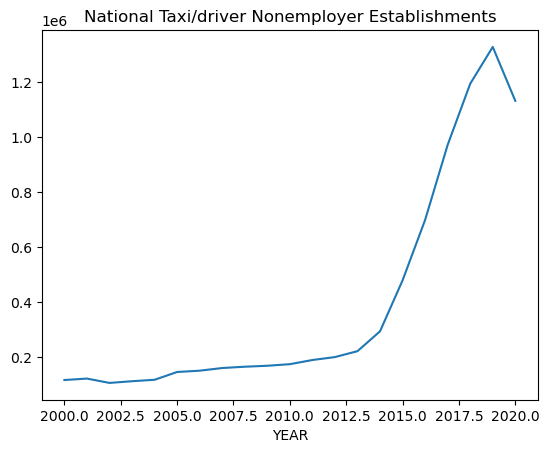

In [61]:
df_taxi_nes.groupby('YEAR').DRIVER_NONEMP_ESTAB.sum().plot().set(title = "National Taxi/driver Nonemployer Establishments")

[Text(0.5, 1.0, 'National Taxi/driver Nonemployer Revenue\n (Real USD)')]

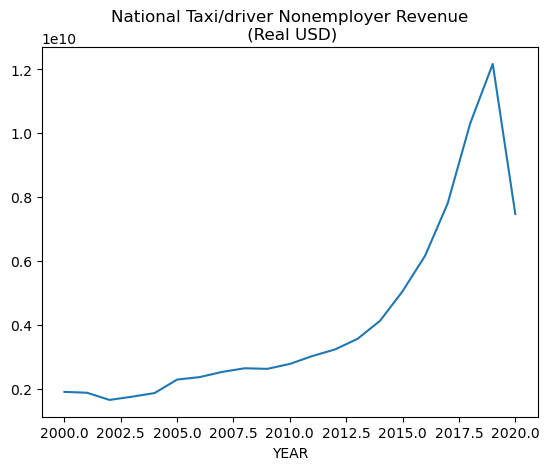

In [62]:
df_taxi_nes_real.groupby('YEAR').DRIVER_NONEMP_RCPTOT_REAL.sum().plot().set(title = "National Taxi/driver Nonemployer Revenue\n (Real USD)")

### The join

Left join indicator df to master dataset so that we only keep observations for counties & years where we have a VMT value

In [63]:
df_master.dtypes

STATE_CODE            object
COUNTY_CODE           object
YEAR                   int64
VMT                  float64
POPULATION           float64
TOTAL_EMISSIONS      float64
True_Fips            float64
True_GDP             float64
Unemployment_Rate    float64
Charging_Stations    float64
LNMILES              float64
TMS                  float64
TELEWORK             float64
distributed_UPT      float64
Full_FIPS_Code        object
dtype: object

In [64]:
df_area.dtypes

Full_FIPS_Code     object
YEAR                int64
ALAND_SQMI        float64
dtype: object

In [65]:
df = pd.merge(df_master,df_area, on = ['Full_FIPS_Code', 'YEAR'] , how='left')

In [66]:
df.isna().sum()

STATE_CODE               0
COUNTY_CODE              0
YEAR                     0
VMT                      0
POPULATION             175
TOTAL_EMISSIONS      47240
True_Fips             3123
True_GDP              3123
Unemployment_Rate      175
Charging_Stations        0
LNMILES               1864
TMS                  20034
TELEWORK             20034
distributed_UPT       5791
Full_FIPS_Code           0
ALAND_SQMI             131
dtype: int64

In [67]:
df1 = pd.merge(df, df_warehouse, on = ['Full_FIPS_Code', 'YEAR'] , how='left')

Confirmed when WAREHOUSE_EMPLY comes in as a zero, this is a suppressed cell. When it comes in as NaN the FIPS does not exist in the QCEW df

In [68]:
df1[df1['WAREHOUSE_EMPLY'] == 0].disclosure_WAREHOUSE_EMPLY.unique()   #expect this to be just N

array(['N'], dtype=object)

In [69]:
df1[(df1['WAREHOUSE_EMPLY'].isna()) & (df1['WAREHOUSE_EMPLY'].notna() ) ]    #expect this to be empty 

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT,Full_FIPS_Code,ALAND_SQMI,disclosure_WAREHOUSE_EMPLY,WAREHOUSE_EMPLY


When joined, 22k suppressed cells for warehouse employment --> these will become NAs and will not be included in modeling

In [70]:
len(df1[df1['WAREHOUSE_EMPLY'] == 0])

22524

When joined 13k above zero observations for warehouse employment --> used as modeling observations

In [71]:
len(df1[df1['WAREHOUSE_EMPLY'] > 0])

13767

When joined 24k observations with no warehouse employment ('true zeros' becasue these counties had no employment to report) --> used as modeling observations

In [72]:
len(df1[df1['WAREHOUSE_EMPLY'].isna()])

25799

States 48 (TX), 13 (GA), 51 (VA), 46 (SD), and 21 (KY) consistently do not have any warehousing employment 

In [73]:
df1[df1['WAREHOUSE_EMPLY'].isna()].groupby('STATE_CODE').size().sort_values(ascending = False)

STATE_CODE
48    2605
13    1281
21    1148
20    1019
46    1011
51    1006
29     983
31     937
27     893
30     851
38     844
47     837
19     764
17     719
28     708
26     688
40     681
18     660
05     614
54     580
55     575
01     541
37     536
08     502
16     502
35     423
12     399
22     383
49     337
39     335
56     314
42     251
36     251
41     242
53     229
45     221
06     191
32     164
02     160
04      99
24      82
23      67
50      66
44      29
25      27
33      22
15       8
09       7
34       4
10       2
11       1
dtype: int64

Having checked to make sure the join worked properly, we can remove the disclosure_WAREHOUSE_EMPLY column and move on the the next indicator join

In [74]:
df1 = df1.drop(['disclosure_WAREHOUSE_EMPLY'], axis=1)

In [75]:
df2 = pd.merge(df1, df_courier_qcew, on = ['Full_FIPS_Code', 'YEAR'] , how='left')

In [76]:
df2

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT,Full_FIPS_Code,ALAND_SQMI,WAREHOUSE_EMPLY,disclosure_COURIER_EMPLOYER,COURIER_EMPLY,COURIER_WAGES
0,01,001,2000,2.744493e+08,44021.0,NaN,NaN,NaN,0.041,0.0,1980.320,NaN,NaN,NaN,01001,595.968032,NaN,NaN,NaN,NaN
1,01,003,2000,1.196020e+09,141342.0,NaN,NaN,NaN,0.037,0.0,4905.660,NaN,NaN,NaN,01003,1596.346694,NaN,NaN,NaN,NaN
2,01,005,2000,1.276073e+08,29015.0,NaN,NaN,NaN,0.056,0.0,2479.120,NaN,NaN,NaN,01005,884.903549,NaN,NaN,NaN,NaN
3,01,007,2000,9.060923e+07,19913.0,NaN,NaN,NaN,0.054,0.0,1804.750,NaN,NaN,NaN,01007,623.025058,NaN,NaN,NaN,NaN
4,01,009,2000,2.181014e+08,51107.0,NaN,NaN,NaN,0.035,0.0,2763.560,NaN,NaN,NaN,01009,645.585188,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,039,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,0.083,0.0,1892.258,0.035474,0.063883,0.0,56039,3995.379000,NaN,NaN,44.0,2147159.0
62086,56,041,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,0.076,0.0,1636.360,NaN,NaN,0.0,56041,2081.264000,NaN,N,0.0,0.0
62087,56,043,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,0.064,0.0,902.936,0.011035,0.026439,0.0,56043,2238.549000,0.0,NaN,NaN,NaN
62088,56,045,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,0.052,0.0,1736.770,0.011035,0.026439,0.0,56045,2398.089000,NaN,NaN,NaN,NaN


Confirming results are as expected

In [77]:
df2[df2['COURIER_EMPLY'] == 0].disclosure_COURIER_EMPLOYER.unique()  #expecting only N

array(['N'], dtype=object)

In [78]:
df2[ (df2['disclosure_COURIER_EMPLOYER'].isna() ) & (df2['COURIER_WAGES'] == 0)] #expecting a df with zero rows 

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT,Full_FIPS_Code,ALAND_SQMI,WAREHOUSE_EMPLY,disclosure_COURIER_EMPLOYER,COURIER_EMPLY,COURIER_WAGES


Having checked to make sure the join worked properly, we can remove the disclosure_COURIER_EMPLOYER column and move on the the next indicator join

In [79]:
df2 = df2.drop(['disclosure_COURIER_EMPLOYER'], axis=1)

In [80]:
df3 = pd.merge(df2, df_courier_nes_real, on = ['Full_FIPS_Code', 'YEAR'] , how='left')

In [81]:
df3

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT,Full_FIPS_Code,ALAND_SQMI,WAREHOUSE_EMPLY,COURIER_EMPLY,COURIER_WAGES,ESTAB_F_COURIER,COURIER_NONEMP_ESTAB,RCPTOT_F_COURIER,COURIER_NONEMP_RCPTOT,CPI,COURIER_NONEMP_RCPTOT_REAL
0,01,001,2000,2.744493e+08,44021.0,NaN,NaN,NaN,0.041,0.0,1980.320,NaN,NaN,NaN,01001,595.968032,NaN,NaN,NaN,D,0.0,D,0.0,1.72,0.00
1,01,003,2000,1.196020e+09,141342.0,NaN,NaN,NaN,0.037,0.0,4905.660,NaN,NaN,NaN,01003,1596.346694,NaN,NaN,NaN,NaN,49.0,NaN,849000.0,1.72,493604.65
2,01,005,2000,1.276073e+08,29015.0,NaN,NaN,NaN,0.056,0.0,2479.120,NaN,NaN,NaN,01005,884.903549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,007,2000,9.060923e+07,19913.0,NaN,NaN,NaN,0.054,0.0,1804.750,NaN,NaN,NaN,01007,623.025058,NaN,NaN,NaN,D,0.0,D,0.0,1.72,0.00
4,01,009,2000,2.181014e+08,51107.0,NaN,NaN,NaN,0.035,0.0,2763.560,NaN,NaN,NaN,01009,645.585188,NaN,NaN,NaN,D,0.0,D,0.0,1.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,039,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,0.083,0.0,1892.258,0.035474,0.063883,0.0,56039,3995.379000,NaN,44.0,2147159.0,NaN,18.0,NaN,255000.0,2.18,116972.48
62086,56,041,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,0.076,0.0,1636.360,NaN,NaN,0.0,56041,2081.264000,NaN,0.0,0.0,NaN,5.0,NaN,47000.0,2.18,21559.63
62087,56,043,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,0.064,0.0,902.936,0.011035,0.026439,0.0,56043,2238.549000,0.0,NaN,NaN,D,0.0,D,0.0,2.18,0.00
62088,56,045,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,0.052,0.0,1736.770,0.011035,0.026439,0.0,56045,2398.089000,NaN,NaN,NaN,NaN,3.0,NaN,69000.0,2.18,31651.38


In [82]:
df3[df3['COURIER_NONEMP_ESTAB'] == 0].ESTAB_F_COURIER.unique()  #expecting only D and S

array(['D', 'S'], dtype=object)

In [83]:
print(df3[df3['ESTAB_F_COURIER'] == 'S'].COURIER_NONEMP_ESTAB.unique())
print(df3[df3['ESTAB_F_COURIER'] == 'D'].COURIER_NONEMP_ESTAB.unique())
print(df3[df3['RCPTOT_F_COURIER'] == 'S'].COURIER_NONEMP_RCPTOT.unique())
print(df3[df3['RCPTOT_F_COURIER'] == 'D'].COURIER_NONEMP_RCPTOT.unique())

[0.]
[0.]
[0.]
[0.]


Having checked to make sure the join worked properly, we can remove the ESTAB_F_COURIER and RCPTOT_F_COURIER column and move on the the next indicator join

In [84]:
df3 = df3.drop(['ESTAB_F_COURIER', 'RCPTOT_F_COURIER' ], axis=1)

In [85]:
df4 = pd.merge(df3, df_taxi_nes_real, on = ['Full_FIPS_Code', 'YEAR'] , how='left')

In [86]:
df4

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT,Full_FIPS_Code,ALAND_SQMI,WAREHOUSE_EMPLY,COURIER_EMPLY,COURIER_WAGES,COURIER_NONEMP_ESTAB,COURIER_NONEMP_RCPTOT,CPI,COURIER_NONEMP_RCPTOT_REAL,ESTAB_F_DRIVER,DRIVER_NONEMP_ESTAB,RCPTOT_F_DRIVER,DRIVER_NONEMP_RCPTOT,DRIVER_NONEMP_RCPTOT_REAL
0,01,001,2000,2.744493e+08,44021.0,NaN,NaN,NaN,0.041,0.0,1980.320,NaN,NaN,NaN,01001,595.968032,NaN,NaN,NaN,0.0,0.0,1.72,0.00,NaN,NaN,NaN,NaN,NaN
1,01,003,2000,1.196020e+09,141342.0,NaN,NaN,NaN,0.037,0.0,4905.660,NaN,NaN,NaN,01003,1596.346694,NaN,NaN,NaN,49.0,849000.0,1.72,493604.65,D,0.0,D,0.0,0.00
2,01,005,2000,1.276073e+08,29015.0,NaN,NaN,NaN,0.056,0.0,2479.120,NaN,NaN,NaN,01005,884.903549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,007,2000,9.060923e+07,19913.0,NaN,NaN,NaN,0.054,0.0,1804.750,NaN,NaN,NaN,01007,623.025058,NaN,NaN,NaN,0.0,0.0,1.72,0.00,NaN,NaN,NaN,NaN,NaN
4,01,009,2000,2.181014e+08,51107.0,NaN,NaN,NaN,0.035,0.0,2763.560,NaN,NaN,NaN,01009,645.585188,NaN,NaN,NaN,0.0,0.0,1.72,0.00,D,0.0,D,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,039,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,0.083,0.0,1892.258,0.035474,0.063883,0.0,56039,3995.379000,NaN,44.0,2147159.0,18.0,255000.0,2.18,116972.48,NaN,13.0,NaN,158000.0,72477.06
62086,56,041,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,0.076,0.0,1636.360,NaN,NaN,0.0,56041,2081.264000,NaN,0.0,0.0,5.0,47000.0,2.18,21559.63,D,0.0,D,0.0,0.00
62087,56,043,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,0.064,0.0,902.936,0.011035,0.026439,0.0,56043,2238.549000,0.0,NaN,NaN,0.0,0.0,2.18,0.00,NaN,NaN,NaN,NaN,NaN
62088,56,045,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,0.052,0.0,1736.770,0.011035,0.026439,0.0,56045,2398.089000,NaN,NaN,NaN,3.0,69000.0,2.18,31651.38,NaN,NaN,NaN,NaN,NaN


In [87]:
df4[df4['DRIVER_NONEMP_ESTAB'] == 0].ESTAB_F_DRIVER.unique()

array(['D', 'S'], dtype=object)

In [88]:
df_final = df4.drop(['ESTAB_F_DRIVER', 'RCPTOT_F_DRIVER' ], axis=1)

In [89]:
df_final.dtypes

STATE_CODE                     object
COUNTY_CODE                    object
YEAR                            int64
VMT                           float64
POPULATION                    float64
TOTAL_EMISSIONS               float64
True_Fips                     float64
True_GDP                      float64
Unemployment_Rate             float64
Charging_Stations             float64
LNMILES                       float64
TMS                           float64
TELEWORK                      float64
distributed_UPT               float64
Full_FIPS_Code                 object
ALAND_SQMI                    float64
WAREHOUSE_EMPLY               float64
COURIER_EMPLY                 float64
COURIER_WAGES                 float64
COURIER_NONEMP_ESTAB          float64
COURIER_NONEMP_RCPTOT         float64
CPI                           float64
COURIER_NONEMP_RCPTOT_REAL    float64
DRIVER_NONEMP_ESTAB           float64
DRIVER_NONEMP_RCPTOT          float64
DRIVER_NONEMP_RCPTOT_REAL     float64
dtype: objec

### Calculate the population density column 

population density = people per square mile

In [90]:
df_final['POP_DENSITY'] = df_final['POPULATION'] / df_final['ALAND_SQMI']

Checking to make sure the data looks correct, NY city has the highest population density and 

In [91]:
df_final.sort_values('POP_DENSITY', ascending=False)

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT,Full_FIPS_Code,ALAND_SQMI,WAREHOUSE_EMPLY,COURIER_EMPLY,COURIER_WAGES,COURIER_NONEMP_ESTAB,COURIER_NONEMP_RCPTOT,CPI,COURIER_NONEMP_RCPTOT_REAL,DRIVER_NONEMP_ESTAB,DRIVER_NONEMP_RCPTOT,DRIVER_NONEMP_RCPTOT_REAL,POP_DENSITY
33559,36,061,2020,9.384977e+08,1677306.0,1.684015e+06,36061.0,612551534.0,0.095,281.0,1349.21,0.379174,0.325618,2.342364e+08,36061,22.656,0.0,8005.0,389321515.0,3076.0,46423000.0,2.59,17923938.22,8563.0,233831000.0,9.028224e+07,74033.633475
33124,36,061,2015,1.246198e+09,1636063.0,NaN,36061.0,572611451.0,0.048,56.0,1347.97,0.584872,0.070136,6.208194e+08,36061,22.656,563.0,7263.0,324648086.0,884.0,18134000.0,2.37,7651476.79,6869.0,280252000.0,1.182498e+08,72213.232698
33310,36,061,2016,1.220080e+09,1635443.0,NaN,36061.0,594614177.0,0.045,135.0,1291.58,0.576919,0.076280,6.069584e+08,36061,22.655,859.0,7845.0,351282189.0,1111.0,20795000.0,2.40,8664583.33,8017.0,298732000.0,1.244717e+08,72189.053189
33123,36,061,2014,1.242989e+09,1630678.0,3.048038e+06,36061.0,563067749.0,0.060,1.0,1352.88,0.596336,0.065212,6.618162e+08,36061,22.656,568.0,6971.0,312083858.0,772.0,18245000.0,2.37,7698312.24,6155.0,267093000.0,1.126975e+08,71975.547316
33372,36,061,2017,1.222871e+09,1630698.0,2.503553e+06,36061.0,603678816.0,0.040,194.0,1335.53,0.589093,0.069686,6.216368e+08,36061,22.657,851.0,8213.0,392722137.0,1263.0,24652000.0,2.45,10062040.82,8887.0,322771000.0,1.317433e+08,71973.253299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61419,46,113,2010,4.035581e+07,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.006197,0.088545,0.000000e+00,46113,2093.898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61869,51,515,2010,4.607032e+07,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000e+00,51515,6.878,NaN,NaN,NaN,3.0,57000.0,2.18,26146.79,0.0,0.0,0.000000e+00,NaN
61874,51,560,2010,7.346161e+06,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000e+00,51560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61901,51,780,2010,3.068095e+07,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000e+00,51780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df_final[df_final['STATE_CODE'] == '06'].groupby('YEAR').median().reset_index()

,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,distributed_UPT,ALAND_SQMI,WAREHOUSE_EMPLY,COURIER_EMPLY,COURIER_WAGES,COURIER_NONEMP_ESTAB,COURIER_NONEMP_RCPTOT,CPI,COURIER_NONEMP_RCPTOT_REAL,DRIVER_NONEMP_ESTAB,DRIVER_NONEMP_RCPTOT,DRIVER_NONEMP_RCPTOT_REAL,POP_DENSITY
0,2000,6.382090e+08,166725.0,NaN,NaN,NaN,0.0575,0.0,4389.7660,NaN,NaN,NaN,1534.834491,558.5,708.0,22115392.0,38.0,740000.0,1.72,430232.560,11.0,193000.0,112209.300,94.531488
1,2001,6.745590e+08,170872.5,NaN,6058.0,6302600.0,0.0595,0.0,4305.1010,NaN,NaN,NaN,1534.834491,272.0,351.0,11468114.0,36.0,1067000.0,1.77,602824.860,0.0,0.0,0.000,96.321655
2,2002,7.058174e+08,175262.5,NaN,6058.0,6848682.5,0.0710,0.0,4438.8360,NaN,NaN,0.000000,1534.834491,213.5,337.0,11481759.0,14.0,264500.0,1.80,146944.445,0.0,0.0,0.000,97.890634
3,2003,7.306198e+08,178078.0,NaN,6058.0,7066984.5,0.0735,0.0,4436.8230,NaN,NaN,0.000000,1534.834491,186.5,314.5,11341356.0,14.0,322000.0,1.84,175000.000,0.0,0.0,0.000,99.652252
4,2004,7.602472e+08,180052.0,NaN,6058.0,7312580.5,0.0680,0.0,4427.0970,NaN,NaN,0.000000,1534.834491,214.5,287.5,11271255.5,26.0,536000.0,1.89,283597.880,0.0,0.0,0.000,100.925216
5,2005,7.130127e+08,180942.0,NaN,6058.0,7550859.5,0.0630,0.0,4429.5540,0.011489,0.040157,0.000000,1534.834491,243.0,286.0,11757837.0,66.0,1439000.0,1.95,737948.715,27.0,1090000.0,558974.360,103.319022
6,2006,7.350600e+08,183194.0,NaN,6058.0,7599207.0,0.0560,0.0,4443.9220,0.012461,0.042368,0.000000,1534.834491,246.0,162.5,5798822.0,71.5,1810500.0,2.02,896287.125,30.5,1339500.0,663118.815,104.758313
7,2007,7.434342e+08,186016.5,NaN,6058.0,7809057.0,0.0600,0.0,4430.9125,0.010700,0.040563,0.000000,1534.834491,235.0,170.5,6109580.0,71.0,1639000.0,2.07,791787.440,28.0,994000.0,480193.235,106.000884
8,2008,6.876269e+08,188152.0,NaN,6058.0,7376256.0,0.0805,0.0,4429.8415,0.015087,0.052761,0.000000,1534.834491,213.0,204.5,7582242.5,65.5,1499000.0,2.15,697209.300,29.0,1171000.0,544651.160,107.004049
9,2009,6.818222e+08,190123.0,NaN,6058.0,7330986.5,0.1215,0.0,4277.6060,0.011628,0.066270,0.000000,1534.834491,261.0,185.5,7457565.0,61.0,1453500.0,2.15,676046.510,29.0,976500.0,454186.045,107.475662


### Convert missing values to zeros and suppressed cells to NaN

We are confident that cells (counties & years) that come in as NaN from QCEW and NES can be approporiately represented as zeros because they were not reported in the origional data. 

The suppressed data (currenlty zeros) should be converted to NaN so they are not included in the modeling 

1.  convert NaN values (true zeros) to a placeholder value 
2. convert zeros to NaN (turn suppressed observations to NaN)
3. convert 'true_zeros' to 0.0 (numeric)

In [93]:
df_final.WAREHOUSE_EMPLY.fillna('true_zero', inplace = True)
df_final.WAREHOUSE_EMPLY.replace(0, np.nan, inplace = True)
df_final.WAREHOUSE_EMPLY.replace('true_zero', 0.0, inplace = True)

Making sure the number of above zero values is still the same 

In [94]:
print("Above zero observations:", len(df_final[df_final['WAREHOUSE_EMPLY'] > 0]))
print("Suppressed observations (NA):", len(df_final[df_final['WAREHOUSE_EMPLY'].isna()]))
print("No employment activity (true zero):", len(df_final[df_final['WAREHOUSE_EMPLY'] == 0]))

Above zero observations: 13767
Suppressed observations (NA): 22524
No employment activity (true zero): 25799


In [95]:
df_final.COURIER_EMPLY.fillna('true_zero', inplace = True)
df_final.COURIER_EMPLY.replace(0, np.nan, inplace = True)
df_final.COURIER_EMPLY.replace('true_zero', 0.0, inplace = True)

In [96]:
df_final.COURIER_WAGES.fillna('true_zero', inplace = True)
df_final.COURIER_WAGES.replace(0, np.nan, inplace = True)
df_final.COURIER_WAGES.replace('true_zero', 0.0, inplace = True)

In [97]:
df_final.COURIER_NONEMP_ESTAB.fillna('true_zero', inplace = True)
df_final.COURIER_NONEMP_ESTAB.replace(0, np.nan, inplace = True)
df_final.COURIER_NONEMP_ESTAB.replace('true_zero', 0.0, inplace = True)

In [98]:
df_final.COURIER_NONEMP_RCPTOT.fillna('true_zero', inplace = True)
df_final.COURIER_NONEMP_RCPTOT.replace(0, np.nan, inplace = True)
df_final.COURIER_NONEMP_RCPTOT.replace('true_zero', 0.0, inplace = True)

In [99]:
df_final.DRIVER_NONEMP_ESTAB.fillna('true_zero', inplace = True)
df_final.DRIVER_NONEMP_ESTAB.replace(0, np.nan, inplace = True)
df_final.DRIVER_NONEMP_ESTAB.replace('true_zero', 0.0, inplace = True)

In [100]:
df_final.DRIVER_NONEMP_RCPTOT.fillna('true_zero', inplace = True)
df_final.DRIVER_NONEMP_RCPTOT.replace(0, np.nan, inplace = True)
df_final.DRIVER_NONEMP_RCPTOT.replace('true_zero', 0.0, inplace = True)

### Creating new column for courier total working population (employer and nonemployer)

*Decided against using this created indicator because each have suppressoin in different cells so the summation is not an accurate representation of both employer and nonemployer couriers*

In order to add these two columns together, we need to replace the NAs with zeros so the new values in COURIER_POP don't get overwritten to NaN if either COURIER_EMPLY or COURIER_NONEMP_ESTAB is NaN

In [101]:
#df_final['COURIER_POP'] = df_final['COURIER_EMPLY'].fillna(0) + df_final['COURIER_NONEMP_ESTAB'].fillna(0)

Want to replace zeros in COURIER_POP with NaN only if both COURIER_EMPLY and COURIER_NONEMP_ESTAB were NaN because this means both COURIER_EMPLY and COURIER_NONEMP_ESTAB were suppressed for that ocunty and that year, therefore, the total courier population should also be shown as suppressed (or NA) rather than a zero (there are 3k cases of this)

In [102]:
#idx = df_final[(df_final['COURIER_EMPLY'].isna()) & (df_final['COURIER_NONEMP_ESTAB'].isna())].index
#for i in idx: 
   # df_final.at[i, 'COURIER_POP'] = None

In [103]:
#df_final[df_final['COURIER_POP'].isna()]

In [104]:
#df_final[(df_final['COURIER_EMPLY'].isna()) & (df_final['COURIER_NONEMP_ESTAB'].isna())]   #checking to make sure NAs filled correctly

### Creating new column for nonemployer couriers where we assume observations of supression to be zero

*Also decided we would not use this indicator but keeping code here, commented out, in case we want it in the future*

In [105]:
#df_final['COURIER_NONEMP_ESTAB_ESTIMATE'] = df_final['COURIER_NONEMP_ESTAB'].fillna(0)

In [106]:
#df_final[df_final["COURIER_NONEMP_ESTAB_ESTIMATE"].isna()]

### Suppresion & NA counts 

In [107]:
data = [['WAREHOUSE_EMPLY', len(df_final[df_final['WAREHOUSE_EMPLY'] > 0]), len(df_final[df_final['WAREHOUSE_EMPLY'] == 0]), len(df_final[df_final['WAREHOUSE_EMPLY'].isna()])], 
        ['COURIER_EMPLY', len(df_final[df_final['COURIER_EMPLY'] > 0]), len(df_final[df_final['COURIER_EMPLY'] == 0]), len(df_final[df_final['COURIER_EMPLY'].isna()]) ],
        ['COURIER_WAGES', len(df_final[df_final['COURIER_WAGES'] > 0]), len(df_final[df_final['COURIER_WAGES'] == 0]), len(df_final[df_final['COURIER_WAGES'].isna()]) ], 
        ['COURIER_NONEMP_ESTAB', len(df_final[df_final['COURIER_NONEMP_ESTAB'] > 0]), len(df_final[df_final['COURIER_NONEMP_ESTAB'] == 0]), len(df_final[df_final['COURIER_NONEMP_ESTAB'].isna()]) ], 
        ['COURIER_NONEMP_RCPTOT', len(df_final[df_final['COURIER_NONEMP_RCPTOT'] > 0]), len(df_final[df_final['COURIER_NONEMP_RCPTOT'] == 0]), len(df_final[df_final['COURIER_NONEMP_RCPTOT'].isna()])  ], 
        ['DRIVER_NONEMP_ESTAB', len(df_final[df_final['DRIVER_NONEMP_ESTAB'] > 0]), len(df_final[df_final['DRIVER_NONEMP_ESTAB'] == 0]), len(df_final[df_final['DRIVER_NONEMP_ESTAB'].isna()]) ], 
        ['DRIVER_NONEMP_RCPTOT', len(df_final[df_final['DRIVER_NONEMP_RCPTOT'] > 0]), len(df_final[df_final['DRIVER_NONEMP_RCPTOT'] == 0]), len(df_final[df_final['DRIVER_NONEMP_RCPTOT'].isna()]) ] , 
        ['POP_DENSITY', len(df_final[df_final['POP_DENSITY'] > 0]), len(df_final[df_final['POP_DENSITY'] == 0]), len(df_final[df_final['POP_DENSITY'].isna()])]
       ]

df_counts = pd.DataFrame(data, columns = ['Indicator',  'Non zero values', 'Zeros (nothing reported)', 'NAs (suppressed obs)'])

In [108]:
df_counts['Total N for VMT'] = df_counts['Non zero values'] + df_counts['Zeros (nothing reported)'] + df_counts['NAs (suppressed obs)']

In [109]:
df_counts['Percent Non Zeros (%)'] = round((df_counts['Non zero values'] / df_counts['Total N for VMT'])*100, 2)
df_counts['Percent Zeros (%)'] = round((df_counts['Zeros (nothing reported)'] / df_counts['Total N for VMT'])*100, 2)
df_counts['Percent Suppressed (%)'] = round((df_counts['NAs (suppressed obs)'] / df_counts['Total N for VMT'])*100, 2)

In [110]:
df_counts = df_counts[['Indicator', 'Non zero values', 'Percent Non Zeros (%)', 'Zeros (nothing reported)', 
                      'Percent Zeros (%)', 'NAs (suppressed obs)', 'Percent Suppressed (%)', 'Total N for VMT']]
df_counts

,Indicator,Non zero values,Percent Non Zeros (%),Zeros (nothing reported),Percent Zeros (%),NAs (suppressed obs),Percent Suppressed (%),Total N for VMT
0,WAREHOUSE_EMPLY,13767,22.17,25799,41.55,22524,36.28,62090
1,COURIER_EMPLY,13005,20.95,29384,47.32,19701,31.73,62090
2,COURIER_WAGES,13005,20.95,29384,47.32,19701,31.73,62090
3,COURIER_NONEMP_ESTAB,42962,69.19,3622,5.83,15506,24.97,62090
4,COURIER_NONEMP_RCPTOT,42962,69.19,3622,5.83,15506,24.97,62090
5,DRIVER_NONEMP_ESTAB,23957,38.58,19095,30.75,19038,30.66,62090
6,DRIVER_NONEMP_RCPTOT,23957,38.58,19095,30.75,19038,30.66,62090
7,POP_DENSITY,61906,99.70,0,0.00,184,0.30,62090


### Adjusting to final Transit indicators used for modeling

In [111]:
#drop old UPT indicator
df_final = df_final.drop('distributed_UPT', axis = 1)

In [112]:
df_final

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,Full_FIPS_Code,ALAND_SQMI,WAREHOUSE_EMPLY,COURIER_EMPLY,COURIER_WAGES,COURIER_NONEMP_ESTAB,COURIER_NONEMP_RCPTOT,CPI,COURIER_NONEMP_RCPTOT_REAL,DRIVER_NONEMP_ESTAB,DRIVER_NONEMP_RCPTOT,DRIVER_NONEMP_RCPTOT_REAL,POP_DENSITY
0,01,001,2000,2.744493e+08,44021.0,NaN,NaN,NaN,0.041,0.0,1980.320,NaN,NaN,01001,595.968032,0.0,0.0,0.0,NaN,NaN,1.72,0.00,0.0,0.0,NaN,73.864700
1,01,003,2000,1.196020e+09,141342.0,NaN,NaN,NaN,0.037,0.0,4905.660,NaN,NaN,01003,1596.346694,0.0,0.0,0.0,49.0,849000.0,1.72,493604.65,NaN,NaN,0.00,88.540917
2,01,005,2000,1.276073e+08,29015.0,NaN,NaN,NaN,0.056,0.0,2479.120,NaN,NaN,01005,884.903549,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,32.788884
3,01,007,2000,9.060923e+07,19913.0,NaN,NaN,NaN,0.054,0.0,1804.750,NaN,NaN,01007,623.025058,0.0,0.0,0.0,NaN,NaN,1.72,0.00,0.0,0.0,NaN,31.961796
4,01,009,2000,2.181014e+08,51107.0,NaN,NaN,NaN,0.035,0.0,2763.560,NaN,NaN,01009,645.585188,0.0,0.0,0.0,NaN,NaN,1.72,0.00,NaN,NaN,0.00,79.163836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,039,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,0.083,0.0,1892.258,0.035474,0.063883,56039,3995.379000,0.0,44.0,2147159.0,18.0,255000.0,2.18,116972.48,13.0,158000.0,72477.06,5.330158
62086,56,041,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,0.076,0.0,1636.360,NaN,NaN,56041,2081.264000,0.0,NaN,NaN,5.0,47000.0,2.18,21559.63,NaN,NaN,0.00,10.132785
62087,56,043,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,0.064,0.0,902.936,0.011035,0.026439,56043,2238.549000,NaN,0.0,0.0,NaN,NaN,2.18,0.00,0.0,0.0,NaN,3.810504
62088,56,045,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,0.052,0.0,1736.770,0.011035,0.026439,56045,2398.089000,0.0,0.0,0.0,3.0,69000.0,2.18,31651.38,0.0,0.0,NaN,3.001557


In [113]:
#adding in one of the UPT indicators: 'distributed_UPT' using share of transit commuters (ACS) to distribute UPT from MSA to county level

df_upt_by_commuters = pd.read_csv('Transit/By Transit Users/distributed_UPT_data2_15_2024.csv')
df_upt_by_commuters['STATE_CODE'] = df_upt_by_commuters['STATE_CODE'].astype(int).astype(str).str.zfill(2)
df_upt_by_commuters['COUNTY_CODE'] = df_upt_by_commuters['COUNTY_CODE'].astype(int).astype(str).str.zfill(3)
df_upt_by_commuters['Full_FIPS_Code'] = df_upt_by_commuters['STATE_CODE'] + df_upt_by_commuters['COUNTY_CODE']
df_upt_by_commuters = df_upt_by_commuters[['Full_FIPS_Code', 'YEAR', 'distributed_UPT']]
df_upt_by_commuters = df_upt_by_commuters.rename(columns={'distributed_UPT': 'UPT_distr_commuters'})

df_upt_by_commuters

,Full_FIPS_Code,YEAR,UPT_distr_commuters
0,01001,2005,2.118421e+05
1,01003,2005,2.536278e+06
2,01009,2005,5.187080e+05
3,01033,2005,0.000000e+00
4,01051,2005,2.648026e+05
...,...,...,...
7999,55131,2020,9.688727e+04
8000,55133,2020,4.362167e+05
8001,55139,2020,7.999376e+04
8002,56021,2020,0.000000e+00


In [114]:
df_final = pd.merge(df_final,df_upt_by_commuters, on = ['Full_FIPS_Code', 'YEAR'] , how='left')

In [115]:
# set NA's for UPT equal to zero, assuming if no value is reported in NTD then this is a true zero rather than missing data (NA)
df_final.UPT_distr_commuters.replace(np.nan, 0, inplace = True)

In [116]:
df_final.isna().sum()

STATE_CODE                        0
COUNTY_CODE                       0
YEAR                              0
VMT                               0
POPULATION                      175
TOTAL_EMISSIONS               47240
True_Fips                      3123
True_GDP                       3123
Unemployment_Rate               175
Charging_Stations                 0
LNMILES                        1864
TMS                           20034
TELEWORK                      20034
Full_FIPS_Code                    0
ALAND_SQMI                      131
WAREHOUSE_EMPLY               22524
COURIER_EMPLY                 19701
COURIER_WAGES                 19701
COURIER_NONEMP_ESTAB          15506
COURIER_NONEMP_RCPTOT         15506
CPI                            3622
COURIER_NONEMP_RCPTOT_REAL     3622
DRIVER_NONEMP_ESTAB           19038
DRIVER_NONEMP_RCPTOT          19038
DRIVER_NONEMP_RCPTOT_REAL     19095
POP_DENSITY                     184
UPT_distr_commuters               0
dtype: int64

In [117]:
#replacing zeros with NaN for 2000 and 2001 for UPT indicator (NTD starts reporting in 2002)
idx = df_final[(df_final.YEAR == 2000) | (df_final.YEAR == 2001)].index
for i in idx: 
    df_final.at[i, 'UPT_distr_commuters'] = None

In [119]:
df_transit_users = pd.read_csv('Transit/By Transit Users/TMS_count_of_Riders.csv')

#rename FIPS code column to match the name in the master df 'Full_FIPS_Code', make it a string, and add neccesary zeros 
df_transit_users = df_transit_users.rename(columns={'FIPS_CODE': 'Full_FIPS_Code', 'TMS_COUNT': 'TRANSIT_USER_COUNT'})
#removing rows with NaN for Full_FIPS_Code column 
df_transit_users = df_transit_users[df_transit_users['Full_FIPS_Code'].notna()]
df_transit_users["Full_FIPS_Code"] = df_transit_users["Full_FIPS_Code"].astype(int) #removes '.0' at end of fips codes
df_transit_users["Full_FIPS_Code"] = df_transit_users["Full_FIPS_Code"].astype(str) #converts fips codes to strings
df_transit_users["Full_FIPS_Code"] = df_transit_users["Full_FIPS_Code"].str.zfill(5)#adds preceeding zeros to state code to make all fips codes 5 digits

#remove ST column (not needed in the join)
df_transit_users = df_transit_users.drop(['ST'], axis = 1)
#df_transit_users = df_transit_users.drop(['TMS'], axis = 1)

df_transit_users



,YEAR,Full_FIPS_Code,TRANSIT_USER_COUNT
0,2011,18075,1862.0
1,2011,18033,3384.0
2,2008,47189,12096.0
3,2008,47123,7567.0
4,2008,48253,1494.0
...,...,...,...
44807,2020,05121,1076.0
44808,2020,04015,0.0
44809,2020,19111,3740.0
44810,2020,19121,408.0


In [120]:
df_final = pd.merge(df_final, df_transit_users, on = ['Full_FIPS_Code', 'YEAR'] , how='left')

### Creating 'Per Person' indicators availble for modeling 

In [121]:
df_final['VMT_per_person'] = df_final['VMT'] / df_final['POPULATION']

In [122]:
df_final['GDP_per_person'] = df_final['True_GDP'] / df_final['POPULATION']
df_final['Charging_Stations_per_person'] = df_final['Charging_Stations'] / df_final['POPULATION']
df_final['LNMILES_per_person'] = df_final['LNMILES'] / df_final['POPULATION']
df_final['UPT_per_person'] = df_final['UPT_distr_commuters'] / df_final['POPULATION']

In [123]:
df_final2 = df_final

In [124]:
df_final2.dtypes

STATE_CODE                       object
COUNTY_CODE                      object
YEAR                              int64
VMT                             float64
POPULATION                      float64
TOTAL_EMISSIONS                 float64
True_Fips                       float64
True_GDP                        float64
Unemployment_Rate               float64
Charging_Stations               float64
LNMILES                         float64
TMS                             float64
TELEWORK                        float64
Full_FIPS_Code                   object
ALAND_SQMI                      float64
WAREHOUSE_EMPLY                 float64
COURIER_EMPLY                   float64
COURIER_WAGES                   float64
COURIER_NONEMP_ESTAB            float64
COURIER_NONEMP_RCPTOT           float64
CPI                             float64
COURIER_NONEMP_RCPTOT_REAL      float64
DRIVER_NONEMP_ESTAB             float64
DRIVER_NONEMP_RCPTOT            float64
DRIVER_NONEMP_RCPTOT_REAL       float64


### Joining FHWA county definitions 

loading in county definitions from FHWA Study "Emerging Technologies and Opportunities for Improved Mobility and Safety for Rural Areas" (https://rosap.ntl.bts.gov/view/dot/63185)

In [125]:
df_fhwa_county_def = pd.read_excel('FHWA-County_Designation.xlsx')

#rename FIPS code column to match the name in the master df 'Full_FIPS_Code', make it a string, and add neccesary zeros 
df_fhwa_county_def = df_fhwa_county_def.rename(columns={'FIPS': 'Full_FIPS_Code'})
df_fhwa_county_def = df_fhwa_county_def[df_fhwa_county_def['Full_FIPS_Code'].notna()]

df_fhwa_county_def["Full_FIPS_Code"] = df_fhwa_county_def["Full_FIPS_Code"].astype(int) #removes '.0' at end of fips codes
df_fhwa_county_def["Full_FIPS_Code"] = df_fhwa_county_def["Full_FIPS_Code"].astype(str) #converts fips codes to strings
df_fhwa_county_def["Full_FIPS_Code"] = df_fhwa_county_def["Full_FIPS_Code"].str.zfill(5)#adds preceeding zeros to state code to make all fips codes 5 digits

#remove columnn not needed in the join
df_fhwa_county_def = df_fhwa_county_def.drop(['Census_County', 'Civilian_NonInst_Pop', 'Rural_Pop', 'Rural_Pct'], axis = 1)

df_fhwa_county_def

,Full_FIPS_Code,County_Type
0,28151,Micropolitan
1,28111,Fringe
2,28019,Remote
3,28057,Rural Towns
4,28015,Micropolitan
...,...,...
3138,19043,Fringe
3139,19021,Rural Towns
3140,19077,Fringe
3141,19091,Rural Towns


In [126]:
df_final3 = pd.merge(df_final2, df_fhwa_county_def, on = ['Full_FIPS_Code'] , how='left')

NAs come from the two counties that got renamed in 2010

In [127]:
df_final3[df_final3["County_Type"].isna()]

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,Full_FIPS_Code,ALAND_SQMI,WAREHOUSE_EMPLY,COURIER_EMPLY,COURIER_WAGES,COURIER_NONEMP_ESTAB,COURIER_NONEMP_RCPTOT,CPI,COURIER_NONEMP_RCPTOT_REAL,DRIVER_NONEMP_ESTAB,DRIVER_NONEMP_RCPTOT,DRIVER_NONEMP_RCPTOT_REAL,POP_DENSITY,UPT_distr_commuters,TRANSIT_USER_COUNT,VMT_per_person,GDP_per_person,Charging_Stations_per_person,LNMILES_per_person,UPT_per_person,County_Type
1216,02,001,2000,1.461736e+09,NaN,NaN,NaN,NaN,NaN,0.0,5286.698,NaN,NaN,02001,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,02,002,2000,5.724428e+08,NaN,NaN,NaN,NaN,NaN,0.0,6423.999,NaN,NaN,02002,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1218,02,003,2000,1.024400e+08,NaN,NaN,NaN,NaN,NaN,0.0,1142.682,NaN,NaN,02003,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1219,02,001,2001,1.516560e+09,NaN,NaN,NaN,NaN,NaN,0.0,5285.010,NaN,NaN,02001,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1220,02,002,2001,5.855216e+08,NaN,NaN,NaN,NaN,NaN,0.0,6476.135,NaN,NaN,02002,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61419,46,113,2010,4.035581e+07,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.006197,0.088545,46113,2093.898,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN
61869,51,515,2010,4.607032e+07,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,51515,6.878,0.0,0.0,0.0,3.0,57000.0,2.18,26146.79,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61874,51,560,2010,7.346161e+06,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,51560,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61901,51,780,2010,3.068095e+07,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,51780,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
#import plotly.express as px
#fig = px.scatter(df_final3, x='POPULATION', y='VMT', 
                #facet_col='County_Type', facet_col_wrap=4, facet_row_spacing=0.1, # default is 0.07 when facet_col_wrap is used
                 #facet_col_spacing=0.05,)
#fig.update_yaxes(matches=None, showticklabels=True)
#fig.update_xaxes(matches=None, showticklabels=True)
#fig.show()

In [129]:
'''
import plotly.figure_factory as ff
import numpy as np
import pandas as pd

df = pd.DataFrame({'2012': np.random.randn(200),
                   '2013': np.random.randn(200)+1})
fig = ff.create_distplot([df[c] for c in df.columns], df.columns, bin_size=.25)
fig.show()
'''

"\nimport plotly.figure_factory as ff\nimport numpy as np\nimport pandas as pd\n\ndf = pd.DataFrame({'2012': np.random.randn(200),\n                   '2013': np.random.randn(200)+1})\nfig = ff.create_distplot([df[c] for c in df.columns], df.columns, bin_size=.25)\nfig.show()\n"

In [130]:
'''
import plotly.figure_factory as ff
import numpy as np

x1 = df_final3[(df_final3["County_Type"] == 'Micropolitan') & (df_final3["VMT"].notna()) ]["VMT"].to_list()
x2 = df_final3[(df_final3["County_Type"] == 'Tribal') & (df_final3["VMT"].notna()) ]["VMT"].to_list()
x3 = df_final3[(df_final3["County_Type"] == 'Fringe') & (df_final3["VMT"].notna()) ]["VMT"].to_list()

hist_data = [x1, x2, x3]

group_labels = ['Micropolitan', 'Tribal', 'Fringe']
colors = ['#A56CC1', '#A6ACEC', '#63F5EF']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=.2, show_rug=False)

# Add title
fig.update_layout(title_text='Hist and Curve Plot')
fig.show()
'''

'\nimport plotly.figure_factory as ff\nimport numpy as np\n\nx1 = df_final3[(df_final3["County_Type"] == \'Micropolitan\') & (df_final3["VMT"].notna()) ]["VMT"].to_list()\nx2 = df_final3[(df_final3["County_Type"] == \'Tribal\') & (df_final3["VMT"].notna()) ]["VMT"].to_list()\nx3 = df_final3[(df_final3["County_Type"] == \'Fringe\') & (df_final3["VMT"].notna()) ]["VMT"].to_list()\n\nhist_data = [x1, x2, x3]\n\ngroup_labels = [\'Micropolitan\', \'Tribal\', \'Fringe\']\ncolors = [\'#A56CC1\', \'#A6ACEC\', \'#63F5EF\']\n\n# Create distplot with curve_type set to \'normal\'\nfig = ff.create_distplot(hist_data, group_labels, colors=colors,\n                         bin_size=.2, show_rug=False)\n\n# Add title\nfig.update_layout(title_text=\'Hist and Curve Plot\')\nfig.show()\n'

### Joining Internet Connectivity Data

In [131]:
df_internet_county = pd.read_csv('Broadband/internet_county.csv', index_col = 0)
df_internet_county = df_internet_county.rename(columns={'countycode': 'Full_FIPS_Code', 'year':'YEAR', 'all':'INTERNET_CONNECTIONS'})
df_internet_county['Full_FIPS_Code'] = df_internet_county['Full_FIPS_Code'].astype(str)
df_internet_county["Full_FIPS_Code"] = df_internet_county["Full_FIPS_Code"].str.zfill(5)
df_internet_county = df_internet_county[["YEAR", "Full_FIPS_Code", "INTERNET_CONNECTIONS"]]

df_internet_county

,YEAR,Full_FIPS_Code,INTERNET_CONNECTIONS
0,2009,01001,11000.0
1,2009,01003,56000.0
2,2009,01005,4000.0
3,2009,01007,2000.0
4,2009,01009,10500.0
...,...,...,...
42039,2021,72151,3500.0
42040,2021,72153,7000.0
42041,2021,78010,NaN
42042,2021,78020,NaN


In [132]:
df_final4 = pd.merge(df_final3, df_internet_county, on = ['Full_FIPS_Code', 'YEAR'] , how='left')
df_final4

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,Full_FIPS_Code,ALAND_SQMI,WAREHOUSE_EMPLY,COURIER_EMPLY,COURIER_WAGES,COURIER_NONEMP_ESTAB,COURIER_NONEMP_RCPTOT,CPI,COURIER_NONEMP_RCPTOT_REAL,DRIVER_NONEMP_ESTAB,DRIVER_NONEMP_RCPTOT,DRIVER_NONEMP_RCPTOT_REAL,POP_DENSITY,UPT_distr_commuters,TRANSIT_USER_COUNT,VMT_per_person,GDP_per_person,Charging_Stations_per_person,LNMILES_per_person,UPT_per_person,County_Type,INTERNET_CONNECTIONS
0,01,001,2000,2.744493e+08,44021.0,NaN,NaN,NaN,0.041,0.0,1980.320,NaN,NaN,01001,595.968032,0.0,0.0,0.0,NaN,NaN,1.72,0.00,0.0,0.0,NaN,73.864700,NaN,NaN,6234.507903,NaN,0.0,0.044986,NaN,Metropolitan,NaN
1,01,003,2000,1.196020e+09,141342.0,NaN,NaN,NaN,0.037,0.0,4905.660,NaN,NaN,01003,1596.346694,0.0,0.0,0.0,49.0,849000.0,1.72,493604.65,NaN,NaN,0.00,88.540917,NaN,NaN,8461.890167,NaN,0.0,0.034708,NaN,Fringe,NaN
2,01,005,2000,1.276073e+08,29015.0,NaN,NaN,NaN,0.056,0.0,2479.120,NaN,NaN,01005,884.903549,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,32.788884,NaN,NaN,4397.975330,NaN,0.0,0.085443,NaN,Micropolitan,NaN
3,01,007,2000,9.060923e+07,19913.0,NaN,NaN,NaN,0.054,0.0,1804.750,NaN,NaN,01007,623.025058,0.0,0.0,0.0,NaN,NaN,1.72,0.00,0.0,0.0,NaN,31.961796,NaN,NaN,4550.255070,NaN,0.0,0.090632,NaN,Fringe,NaN
4,01,009,2000,2.181014e+08,51107.0,NaN,NaN,NaN,0.035,0.0,2763.560,NaN,NaN,01009,645.585188,0.0,0.0,0.0,NaN,NaN,1.72,0.00,NaN,NaN,0.00,79.163836,NaN,NaN,4267.544818,NaN,0.0,0.054074,NaN,Fringe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62085,56,039,2010,1.513659e+08,21296.0,NaN,56039.0,1811469.0,0.083,0.0,1892.258,0.035474,0.063883,56039,3995.379000,0.0,44.0,2147159.0,18.0,255000.0,2.18,116972.48,13.0,158000.0,72477.06,5.330158,0.0,9420.0,7107.715186,85.061467,0.0,0.088855,0.0,Destination,7000.0
62086,56,041,2010,2.683489e+08,21089.0,NaN,56041.0,1215130.0,0.076,0.0,1636.360,NaN,NaN,56041,2081.264000,0.0,NaN,NaN,5.0,47000.0,2.18,21559.63,NaN,NaN,0.00,10.132785,0.0,NaN,12724.592366,57.619138,0.0,0.077593,0.0,Rural Towns,4000.0
62087,56,043,2010,4.984219e+07,8530.0,NaN,56043.0,388974.0,0.064,0.0,902.936,0.011035,0.026439,56043,2238.549000,NaN,0.0,0.0,NaN,NaN,2.18,0.00,0.0,0.0,NaN,3.810504,0.0,2076.0,5843.164079,45.600703,0.0,0.105854,0.0,Remote,2000.0
62088,56,045,2010,5.456499e+07,7198.0,NaN,56045.0,310741.0,0.052,0.0,1736.770,0.011035,0.026439,56045,2398.089000,0.0,0.0,0.0,3.0,69000.0,2.18,31651.38,0.0,0.0,NaN,3.001557,0.0,1384.0,7580.576956,43.170464,0.0,0.241285,0.0,Remote,NaN


### Adding Unemployment and Telework level indicators (instead of rates)

Adding # of commuters teleworking and # of people unemployed 

**Unemployment Count**

In [133]:
df_unemply = pd.read_csv('Unemployment/Final_Unemployment_County.csv', index_col = 0)
df_unemply = df_unemply[(df_unemply['Unemployed'].notna()) & (df_unemply['Unemployed'] != 'N.A.')]
df_unemply['Full_FIPS_Code'] = df_unemply.Code.str[2:7]
df_unemply['Unemployed'] = df_unemply['Unemployed'].astype(int)
df_unemply['Unemployment_Rate'] = df_unemply['Unemployment_Rate'].astype(float)
df_unemply['Labor_Force'] = df_unemply['Labor_Force'].astype(int)
df_unemply['UNEMPLOYED'] = df_unemply['Labor_Force'] * (df_unemply['Unemployment_Rate']/100)
df_unemply['YEAR'] = df_unemply['Year'].astype(int)
df_unemply = df_unemply[['Full_FIPS_Code', 'YEAR', 'UNEMPLOYED', 'Labor_Force']]
df_unemply

,Full_FIPS_Code,YEAR,UNEMPLOYED,Labor_Force
0,01001,2000,896.301,21861
1,01003,2000,2589.223,69979
2,01005,2000,641.144,11449
3,01007,2000,465.642,8623
4,01009,2000,884.310,25266
...,...,...,...,...
70858,72145,2021,1417.200,14172
70859,72147,2021,333.676,2804
70860,72149,2021,900.549,7697
70861,72151,2021,943.068,9156


In [134]:
df_final5 = pd.merge(df_final4, df_unemply, on = ['Full_FIPS_Code', 'YEAR'] , how='left')

**Teleworker Count**

In [135]:
#df_telework = pd.read_csv(datapath_github_etl + 'Telework/Teleworkers_By_County.csv')
#df_telework = df_telework[df_telework['ST'].notna()]
#df_telework['ST'] = df_telework['ST'].astype(int)

#for number of teleworkers, we are saying # of teleworkers = % of commuters teleworking * # of commuters (aka number of employed people)
df_final5['TELEWORKERS'] = df_final5['Labor_Force'] * df_final5['TELEWORK']

Spot checking a few states against https://data.census.gov/table

In [136]:
df_check = df_final5.groupby(['YEAR', 'STATE_CODE']).TELEWORKERS.sum().reset_index()
df_check[df_check['STATE_CODE'] == '08']

,YEAR,STATE_CODE,TELEWORKERS
5,2000,08,0.000000
56,2001,08,0.000000
107,2002,08,0.000000
158,2003,08,0.000000
209,2004,08,0.000000
260,2005,08,118781.598359
311,2006,08,113432.663676
362,2007,08,122558.878550
413,2008,08,132383.336549
464,2009,08,145986.458713


### Adding transit funding indicator 

Transit funding indicator comes from National Transit Database which is on the MSA level. To distribute MSA funding to the county level, the proporation of no vehicle HH from ACS was used. 

In [137]:
transit_funding = pd.read_csv('Transit/By cap_funding by zero hh veh/dis_cap_funds_by_zero_car_hh1_9.csv')
transit_funding['FIPS_CODE'] = transit_funding['FIPS_CODE'].astype(int).astype(str).str.zfill(5)
transit_funding = transit_funding.rename(columns={'Capital Funding': 'capital_transit_funding','FIPS_CODE': 'Full_FIPS_Code' })
transit_funding = transit_funding[['YEAR', 'Full_FIPS_Code', 'capital_transit_funding']]

transit_funding

,YEAR,Full_FIPS_Code,capital_transit_funding
0,2005,01001,2.115639e+06
1,2005,01003,2.780840e+05
2,2005,01009,1.021020e+06
3,2005,01033,0.000000e+00
4,2005,01051,2.644549e+06
...,...,...,...
8667,2021,55131,1.988815e+06
8668,2021,55133,2.675891e+06
8669,2021,55139,3.856840e+06
8670,2021,56021,7.842700e+04


In [138]:
#transit_funding[transit_funding['STATE_CODE'] == '25']

In [139]:
df_final6 = pd.merge(df_final5, transit_funding, on = ['Full_FIPS_Code', 'YEAR'] , how='left')

In [140]:
# set NA's for transit funding equal to zero, assuming if no value is reported in NTD then this is a true zero rather than missing data (NA)
df_final6.capital_transit_funding.replace(np.nan, 0, inplace = True)

#replacing zeros with NaN for 2000 and 2001 for transit funding indicator (NTD starts reporting in 2002)
idx = df_final6[(df_final6.YEAR == 2000) | (df_final6.YEAR == 2001)].index
for i in idx: 
    df_final6.at[i, 'capital_transit_funding'] = None

In [141]:
df_final6[df_final6['capital_transit_funding']>0]

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,Full_FIPS_Code,ALAND_SQMI,WAREHOUSE_EMPLY,COURIER_EMPLY,COURIER_WAGES,COURIER_NONEMP_ESTAB,COURIER_NONEMP_RCPTOT,CPI,COURIER_NONEMP_RCPTOT_REAL,DRIVER_NONEMP_ESTAB,DRIVER_NONEMP_RCPTOT,DRIVER_NONEMP_RCPTOT_REAL,POP_DENSITY,UPT_distr_commuters,TRANSIT_USER_COUNT,VMT_per_person,GDP_per_person,Charging_Stations_per_person,LNMILES_per_person,UPT_per_person,County_Type,INTERNET_CONNECTIONS,UNEMPLOYED,Labor_Force,TELEWORKERS,capital_transit_funding
315,01,001,2005,3.229936e+08,49676.0,NaN,1001.0,1195319.0,0.038,0.0,1648.580,0.008177,0.014285,01001,595.968032,0.0,NaN,NaN,10.0,150000.0,1.95,76923.08,NaN,NaN,0.00,83.353464,2.118421e+05,5688.0,6502.004936,24.062304,0.0,0.033187,4.264476,Metropolitan,NaN,907.706,23887.0,341.219308,2.115639e+06
316,01,003,2005,1.340592e+09,162183.0,NaN,1003.0,5502688.0,0.040,0.0,4915.608,0.008196,0.017183,01003,1596.346694,74.0,NaN,NaN,83.0,1654000.0,1.95,848205.13,4.0,40000.0,20512.82,101.596352,2.536278e+06,15904.0,8265.920386,33.928883,0.0,0.030309,15.638371,Fringe,NaN,3064.320,76608.0,1316.340754,2.780840e+05
319,01,009,2005,2.195224e+08,54624.0,NaN,1009.0,887578.0,0.036,0.0,2629.284,0.000216,0.019546,01009,645.585188,NaN,NaN,NaN,25.0,1342000.0,1.95,688205.13,0.0,0.0,NaN,84.611607,5.187080e+05,171.0,4018.791139,16.248865,0.0,0.048134,9.495972,Fringe,NaN,949.608,26378.0,515.573956,1.021020e+06
338,01,051,2005,2.341345e+08,72978.0,NaN,1051.0,1493377.0,0.037,0.0,2623.144,0.008177,0.014285,01051,621.255605,NaN,NaN,NaN,28.0,311000.0,1.95,159487.18,NaN,NaN,0.00,117.468558,2.648026e+05,7110.0,3208.288753,20.463386,0.0,0.035944,3.628527,Fringe,NaN,1271.357,34361.0,490.837554,2.644549e+06
351,01,081,2005,6.524865e+08,126133.0,NaN,1081.0,3914405.0,0.037,0.0,3365.348,0.006413,0.017268,01081,608.710255,NaN,149.0,5359709.0,29.0,450000.0,1.95,230769.23,7.0,142000.0,72820.51,207.213529,0.000000e+00,14931.0,5173.003973,31.033948,0.0,0.026681,0.000000,Metropolitan,NaN,2344.579,63367.0,1094.206924,1.188650e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62038,55,087,2010,4.253347e+08,176908.0,NaN,55087.0,9225128.0,0.079,0.0,4202.796,0.009120,0.037912,55087,637.523000,740.0,159.0,5497695.0,48.0,691000.0,2.18,316972.48,8.0,125000.0,57339.45,277.492734,1.158857e+06,72080.0,2404.270818,52.146472,0.0,0.023757,6.550620,Metropolitan,51000.0,7952.456,100664.0,3816.415169,2.049921e+06
62047,55,105,2010,8.793522e+08,160260.0,NaN,55105.0,5856452.0,0.111,0.0,4347.523,0.005919,0.040809,55105,718.142000,262.0,NaN,NaN,89.0,1341000.0,2.18,615137.61,8.0,215000.0,98623.85,223.159208,2.795480e+05,17252.0,5487.034993,36.543442,0.0,0.027128,1.744340,Metropolitan,42000.0,9180.588,82708.0,3375.264544,1.160416e+06
62050,55,111,2010,3.978514e+08,62050.0,NaN,55111.0,3050867.0,0.083,0.0,3716.744,0.000454,0.048570,55111,830.902000,31.0,NaN,NaN,32.0,635000.0,2.18,291284.40,7.0,74000.0,33944.95,74.677880,4.230430e+05,624.0,6411.786693,49.167881,0.0,0.059899,6.817776,Micropolitan,17000.0,2977.127,35869.0,1742.141739,2.004000e+03
62056,55,123,2010,1.237837e+08,29766.0,NaN,55123.0,1019930.0,0.078,0.0,3305.750,0.001780,0.056528,55123,791.579000,NaN,0.0,0.0,12.0,110000.0,2.18,50458.72,NaN,NaN,0.00,37.603322,1.801350e+05,1225.0,4158.558476,34.264933,0.0,0.111058,6.051703,Fringe,6000.0,1183.494,15173.0,857.698951,3.433816e+06


In [142]:
df_final6[df_final6['YEAR'] == 2002]

,STATE_CODE,COUNTY_CODE,YEAR,VMT,POPULATION,TOTAL_EMISSIONS,True_Fips,True_GDP,Unemployment_Rate,Charging_Stations,LNMILES,TMS,TELEWORK,Full_FIPS_Code,ALAND_SQMI,WAREHOUSE_EMPLY,COURIER_EMPLY,COURIER_WAGES,COURIER_NONEMP_ESTAB,COURIER_NONEMP_RCPTOT,CPI,COURIER_NONEMP_RCPTOT_REAL,DRIVER_NONEMP_ESTAB,DRIVER_NONEMP_RCPTOT,DRIVER_NONEMP_RCPTOT_REAL,POP_DENSITY,UPT_distr_commuters,TRANSIT_USER_COUNT,VMT_per_person,GDP_per_person,Charging_Stations_per_person,LNMILES_per_person,UPT_per_person,County_Type,INTERNET_CONNECTIONS,UNEMPLOYED,Labor_Force,TELEWORKERS,capital_transit_funding
126,01,001,2002,3.027907e+08,45909.0,NaN,1001.0,984039.0,0.048,0.0,1922.240,NaN,NaN,01001,595.968032,NaN,NaN,NaN,NaN,NaN,1.8,0.00,NaN,NaN,0.0,77.032655,0.0,NaN,6595.453560,21.434555,0.0,0.041871,0.0,Metropolitan,NaN,1063.728,22161.0,NaN,0.0
127,01,003,2002,1.231052e+09,147957.0,NaN,1003.0,4193288.0,0.050,0.0,4851.420,NaN,NaN,01003,1596.346694,NaN,NaN,NaN,NaN,NaN,1.8,0.00,NaN,NaN,0.0,92.684754,0.0,NaN,8320.337781,28.341261,0.0,0.032789,0.0,Fringe,NaN,3468.950,69379.0,NaN,0.0
128,01,005,2002,1.334990e+08,28653.0,NaN,1005.0,798398.0,0.077,0.0,2369.790,NaN,NaN,01005,884.903549,0.0,0.0,0.0,NaN,NaN,1.8,0.00,0.0,0.0,NaN,32.379800,0.0,NaN,4659.164555,27.864377,0.0,0.082707,0.0,Micropolitan,NaN,847.462,11006.0,NaN,0.0
129,01,007,2002,8.489820e+07,21199.0,NaN,1007.0,296437.0,0.070,0.0,1859.550,NaN,NaN,01007,623.025058,0.0,0.0,0.0,NaN,NaN,1.8,0.00,0.0,0.0,NaN,34.025919,0.0,NaN,4004.820841,13.983537,0.0,0.087719,0.0,Fringe,NaN,627.270,8961.0,NaN,0.0
130,01,009,2002,2.215053e+08,52551.0,NaN,1009.0,814356.0,0.054,0.0,2627.060,NaN,NaN,01009,645.585188,NaN,0.0,0.0,24.0,399000.0,1.8,221666.67,0.0,0.0,NaN,81.400566,0.0,NaN,4215.054395,15.496489,0.0,0.049991,0.0,Fringe,NaN,1395.144,25836.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55818,56,039,2002,1.572646e+08,18837.0,NaN,56039.0,1562293.0,0.030,0.0,1375.328,NaN,NaN,56039,4007.758741,0.0,NaN,NaN,NaN,NaN,1.8,0.00,NaN,NaN,0.0,4.700133,0.0,NaN,8348.709099,82.937464,0.0,0.073012,0.0,Destination,NaN,413.580,13786.0,NaN,0.0
55819,56,041,2002,2.696866e+08,19587.0,NaN,56041.0,1120573.0,0.042,0.0,1620.948,NaN,NaN,56041,2081.663286,0.0,NaN,NaN,NaN,NaN,1.8,0.00,0.0,0.0,NaN,9.409303,0.0,NaN,13768.653102,57.210037,0.0,0.082756,0.0,Rural Towns,NaN,465.444,11082.0,NaN,0.0
55820,56,043,2002,6.362864e+07,7988.0,NaN,56043.0,344138.0,0.050,0.0,892.662,NaN,NaN,56043,2240.056051,NaN,0.0,0.0,NaN,NaN,1.8,0.00,0.0,0.0,NaN,3.565982,0.0,NaN,7965.527785,43.081873,0.0,0.111750,0.0,Remote,NaN,207.800,4156.0,NaN,0.0
55821,56,045,2002,5.092670e+07,6578.0,NaN,56045.0,269205.0,0.040,0.0,1693.946,NaN,NaN,56045,2397.856074,0.0,0.0,0.0,NaN,NaN,1.8,0.00,0.0,0.0,NaN,2.743284,0.0,NaN,7741.973495,40.925053,0.0,0.257517,0.0,Remote,NaN,132.400,3310.0,NaN,0.0


In [143]:
df_final6.isna().sum()

STATE_CODE                          0
COUNTY_CODE                         0
YEAR                                0
VMT                                 0
POPULATION                        175
TOTAL_EMISSIONS                 47240
True_Fips                        3123
True_GDP                         3123
Unemployment_Rate                 175
Charging_Stations                   0
LNMILES                          1864
TMS                             20034
TELEWORK                        20034
Full_FIPS_Code                      0
ALAND_SQMI                        131
WAREHOUSE_EMPLY                 22524
COURIER_EMPLY                   19701
COURIER_WAGES                   19701
COURIER_NONEMP_ESTAB            15506
COURIER_NONEMP_RCPTOT           15506
CPI                              3622
COURIER_NONEMP_RCPTOT_REAL       3622
DRIVER_NONEMP_ESTAB             19038
DRIVER_NONEMP_RCPTOT            19038
DRIVER_NONEMP_RCPTOT_REAL       19095
POP_DENSITY                       184
UPT_distr_co

In [144]:
len(df_final6)

62090

### Df to CSV

In [145]:
#df_final2.to_csv(datapath + 'VMT_full_y2.csv')
#df_final2.to_csv(datapath + 'County_Year2_9_29_23.csv') 
#df_final2.to_csv(datapath_github + 'County_Year2_10_2_23.csv') 
#df_final3.to_csv(datapath_github + 'County_Year2_10_11_23.csv')  #added fhwa county types 
#df_final3.to_csv(datapath_github + 'County_Year2_10_27_23.csv')
#df_final4.to_csv(datapath_github + 'County_Year2_11_02_23.csv') #added internet connectivity variable
#df_final5.to_csv(datapath_github + 'County_Year2_11_13_23.csv') #added telework and unemployment as counts (instead of rates)
#df_final5.to_csv(datapath_github + 'County_Year2_12_6_23.csv') #updated to new VMT data, adjusted revenue indicators for inflation, added revised UPT indicator
#df_final5.to_csv(datapath_github + 'County_Year2_12_6_23.csv') #updated to new VMT data, adjusted revenue indicators for inflation, added revised UPT indicator
#df_final5.to_csv(datapath_github + 'County_Year2_12_18_23.csv') #added GHG indicator back in (TOTAL_EMISSIONS)
#df_final6.to_csv(datapath_github + 'County_Year2_1_2_24.csv') #added transit funding indicator 
#df_final6.to_csv(datapath_github + 'County_Year2_1_4_24.csv') #removed extra variables we are not using (duplicate CPI column, COURIER_POP,COURIER_NONEMP_ESTAB_ESTIMATE )
#df_final6.to_csv(datapath_github + 'County_Year2_1_8_24.csv') #revised to have the two final transit indicators (1. UPT distributed by share of transit commuters and 2. transit capital funidng) )

In [146]:
df_final6.to_csv('County_Year2_2_16_2024.csv') #revised transit capital funidng indicator


In [147]:
import os
os.chdir("..")
df_final6.to_csv('2. Modeling/Data/County_Year2_2_16_2024.csv')